In [1]:
from halka_arz_functions import *

## Collecting Halka arz data.

In [2]:
year_period = 3
start, end = Delta_Time(years=3)
url = 'https://halkarz.com/k/halka-arz/'
print(f"Stard date {start}, end date {end}.")

Stard date 2021-04-16, end date 2024-04-16.


### Collecting name of stocks

In [8]:
start_year = dt.datetime.today().year
year_period = 3
halka_arz_pages = {}
stocks = {}
for i in range(year_period):
    year_page = url+f'{start_year - i}/'
    #halka_arz_pages.update({page : {'Pages':page_urls(page)}})
    pages = page_urls(year_page)
    for page in pages:
        page_soup = make_soup(page)
        stocks_ = page_soup.find_all(class_ = "halka-arz-list archives")
        for stock in stocks_:
            stock_content = stock.find(class_ = 'il-content')
            stock_symbol = stock_content.find(class_ = 'il-bist-kod').get_text(strip=True)
            stock_name = stock_content.find(class_ = 'il-halka-arz-sirket').find('a')['title']
            stock_page = stock_content.find(class_ = 'il-halka-arz-sirket').find('a')['href']
            stocks.update({stock_symbol :
                            {'url':stock_page,
                             'stock_name':stock_name,
                             'release_year':start_year-i}})

### Collecting details for stocks

In [3]:
for stock in stocks:
    stocks[stock].update({'Halka_arz_info': get_halka_arz_info(stocks[stock]['url'])})
    stocks[stock].update({'Halka_arz_result': get_halka_arz_result(stocks[stock]['url'])})

NameError: name 'stocks' is not defined

### Collecting historical data

In [16]:
for stock in stocks:
    print(stock)
    stocks[stock].update({'Hist_data': get_hist_data(stock, start_date=start, end_date=end)})

RGYAS
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RGYAS.IS']: Exception('%ticker%: No timezone found, symbol may be delisted')



RGYAS DONE BY GOOGLE FINANCE
ENTRA
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ENTRA.IS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



ENTRA DONE BY GOOGLE FINANCE
ODINE
[*********************100%%**********************]  1 of 1 completed
MOGAN
[*********************100%%**********************]  1 of 1 completed
ARTMS
[*********************100%%**********************]  1 of 1 completed
OBAMS
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OBAMS.IS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



OBAMS DONE BY GOOGLE FINANCE
ALVES
[*********************100%%**********************]  1 of 1 completed
LMKDC
[*********************100%%**********************]  1 of 1 completed
BORSK
[*********************100%%**********************]  1 of 1 completed
PATEK
[*********************100%%**********************]  1 of 1 completed
AVPGY
[*********************100%%**********************]  1 of 1 completed
MEGMT
[*********************100%%**********************]  1 of 1 completed
KBORU
[*********************100%%**********************]  1 of 1 completed
SURGY
[*********************100%%**********************]  1 of 1 completed
CATES
[*********************100%%**********************]  1 of 1 completed
SKYMD
[*********************100%%**********************]  1 of 1 completed
BEGYO
[*********************100%%**********************]  1 of 1 completed
AGROT
[*********************100%%**********************]  1 of 1 completed
EKOS
[*********************100%%**********************]  1 of 1 comple

### Save data.

In [2]:
with open('stocks.p', 'wb') as handle:
    pickle.dump(stocks, handle, protocol=pickle.HIGHEST_PROTOCOL)

NameError: name 'stocks' is not defined

## Data preparation

In [2]:
with open('stocks.p', 'rb') as handle:
    Stocks_copy = pickle.load(handle)

### Prepating stock info data

In [3]:
halka_arz_info_df = pd.DataFrame()
for stock in Stocks_copy:
    halka_arz_info_df = pd.concat([halka_arz_info_df, Stocks_copy[stock]['Halka_arz_info']], axis=0, join='outer', ignore_index='True')
halka_arz_info_df.head()

,Halka Arz Tarihi :,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,\n Aracı Kurum : \n (Konsorsiyum)\n,Bist Kodu :,Pazar :,\n Aracı Kurum : \n,Bist İlk İşlem Tarihi :,Fiili Dolaşımdaki Pay :,Fiili Dolaşımdaki Pay Oranı (%) :,Endeks :,Ek Pay :
0,\n 17-18-19 Nisan 2024\n ...,"135,00 TL",Eşit Dağıtım **,"33,357,450 Lot",Ak Yatırım Menkul Değerler A.Ş.\n ...,RGYAS,Yıldız Pazar,NaN,NaN,NaN,NaN,NaN,NaN
1,\n 27-28-29 Mart 2024\n ...,"10,00 TL",Eşit Dağıtım,"369,565,717 Lot",NaN,ENTRA,Yıldız Pazar,Ak Yatırım Menkul Değerler A.Ş.\n ...,4 Nisan 2024,NaN,NaN,NaN,NaN
2,\n 13-14-15 Mart 2024\n ...,"30,00 TL",Eşit Dağıtım,"44,200,000 Lot",NaN,ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,21 Mart 2024,"43,534,318 Lot",%39.39,NaN,NaN
3,\n 28-29 Şubat - 1 Mart 202...,"11,33 TL",Eşit Dağıtım,"262,635,000 Lot",NaN,MOGAN,Yıldız Pazar,İş Yatırım Menkul Değerler A.Ş.\n ...,7 Mart 2024,"262,555,096 Lot",%10.75,BIST500,NaN
4,\n 27-28 Şubat 2024\n ...,"25,35 TL",Eşit Dağıtım **,"20,000,000 Lot",NaN,ARTMS,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,4 Mart 2024,"19,998,335 Lot",%28.56,BIST500,NaN


In [4]:
# Since there is only pre halka arz info for stock at top of list.
halka_arz_info_df.drop(index=0, inplace=True)
halka_arz_info_df.reset_index(drop=True, inplace=True)

In [5]:
# Fixing time column
halka_arz_info_df["Bist İlk İşlem Tarihi : "] = halka_arz_info_df["Bist İlk İşlem Tarihi : "].apply(fix_time_it)
halka_arz_info_df["Bist İlk İşlem Tarihi : "] = pd.to_datetime(halka_arz_info_df["Bist İlk İşlem Tarihi : "])
halka_arz_info_df.head()

,Halka Arz Tarihi :,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,\n Aracı Kurum : \n (Konsorsiyum)\n,Bist Kodu :,Pazar :,\n Aracı Kurum : \n,Bist İlk İşlem Tarihi :,Fiili Dolaşımdaki Pay :,Fiili Dolaşımdaki Pay Oranı (%) :,Endeks :,Ek Pay :
0,\n 27-28-29 Mart 2024\n ...,"10,00 TL",Eşit Dağıtım,"369,565,717 Lot",NaN,ENTRA,Yıldız Pazar,Ak Yatırım Menkul Değerler A.Ş.\n ...,2024-04-04,NaN,NaN,NaN,NaN
1,\n 13-14-15 Mart 2024\n ...,"30,00 TL",Eşit Dağıtım,"44,200,000 Lot",NaN,ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,2024-03-21,"43,534,318 Lot",%39.39,NaN,NaN
2,\n 28-29 Şubat - 1 Mart 202...,"11,33 TL",Eşit Dağıtım,"262,635,000 Lot",NaN,MOGAN,Yıldız Pazar,İş Yatırım Menkul Değerler A.Ş.\n ...,2024-03-07,"262,555,096 Lot",%10.75,BIST500,NaN
3,\n 27-28 Şubat 2024\n ...,"25,35 TL",Eşit Dağıtım **,"20,000,000 Lot",NaN,ARTMS,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,2024-03-04,"19,998,335 Lot",%28.56,BIST500,NaN
4,\n 22-23 Şubat 2024\n ...,"39,24 TL",Eşit Dağıtım,"96,336,345 Lot",NaN,OBAMS,Yıldız Pazar,Türkiye Kalkınma ve Yatırım Bankası A.Ş.\n ...,2024-03-01,"96,325,004 Lot",%20.09,BIST500,NaN


In [6]:
halka_arz_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column                                                                                                   Non-Null Count  Dtype         
---  ------                                                                                                   --------------  -----         
 0   Halka Arz Tarihi :                                                                                       103 non-null    object        
 1   Halka Arz Fiyatı/Aralığı :                                                                               103 non-null    object        
 2   Dağıtım Yöntemi :                                                                                        103 non-null    object        
 3   Pay :                                                                                                    103 non-null    object        
 4   
               Aracı Kurum : 
             

In [7]:
# Droping unnecessary columns and fix some columns
info_df = halka_arz_info_df.drop(columns=['Halka Arz Tarihi : ',
                                        "\n               Aracı Kurum : \n                              (Konsorsiyum)\n                            ",
                                        'Endeks : ','Ek Pay : ',
                                        'Fiili Dolaşımdaki Pay :', 
                                        'Fiili Dolaşımdaki Pay Oranı (%) :'])
info_df.rename(columns={"\n               Aracı Kurum : \n                            ": "Aracı Kurum : ",
                         "Bist Kodu : ": "Symbol"}, inplace=True)
info_df.head()

,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,Symbol,Pazar :,Aracı Kurum :,Bist İlk İşlem Tarihi :
0,"10,00 TL",Eşit Dağıtım,"369,565,717 Lot",ENTRA,Yıldız Pazar,Ak Yatırım Menkul Değerler A.Ş.\n ...,2024-04-04
1,"30,00 TL",Eşit Dağıtım,"44,200,000 Lot",ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,2024-03-21
2,"11,33 TL",Eşit Dağıtım,"262,635,000 Lot",MOGAN,Yıldız Pazar,İş Yatırım Menkul Değerler A.Ş.\n ...,2024-03-07
3,"25,35 TL",Eşit Dağıtım **,"20,000,000 Lot",ARTMS,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,2024-03-04
4,"39,24 TL",Eşit Dağıtım,"96,336,345 Lot",OBAMS,Yıldız Pazar,Türkiye Kalkınma ve Yatırım Bankası A.Ş.\n ...,2024-03-01


In [8]:
# Fixing price column
info_df['Halka Arz Fiyatı/Aralığı : '] = info_df['Halka Arz Fiyatı/Aralığı : '].astype(str)
info_df['Halka Arz Fiyatı/Aralığı : '].dropna(inplace=True)
info_df.drop(info_df[info_df['Halka Arz Fiyatı/Aralığı : '] == 'nan'].index, inplace=True)
info_df['Halka Arz Fiyatı/Aralığı : '] = info_df['Halka Arz Fiyatı/Aralığı : '].apply(value_fix, replace=True)

In [9]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Halka Arz Fiyatı/Aralığı :   103 non-null    float64       
 1   Dağıtım Yöntemi :            103 non-null    object        
 2   Pay :                        103 non-null    object        
 3   Symbol                       103 non-null    object        
 4   Pazar :                      103 non-null    object        
 5   Aracı Kurum :                103 non-null    object        
 6   Bist İlk İşlem Tarihi :      103 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 5.8+ KB


### Preparing historical data

In [10]:
halka_arz_result_df = pd.DataFrame()
for symbol in Stocks_copy:
    for col in Stocks_copy[symbol]['Halka_arz_result'].columns:
        Stocks_copy[symbol]['Halka_arz_result'][col] = Stocks_copy[symbol]['Halka_arz_result'][col].apply(value_fix_dot)
    Stocks_copy[symbol]['Halka_arz_result']['Symbol'] = str(symbol)
    if Stocks_copy[symbol]['Hist_data'].shape[0] == 0:
        continue
    Stocks_copy[symbol]['Halka_arz_result']['Hype_Days'] = get_hyped_days(Stocks_copy[symbol]['Hist_data'])
    halka_arz_result_df = pd.concat([halka_arz_result_df, Stocks_copy[symbol]['Halka_arz_result']], axis=0, join='outer')
halka_arz_result_df.head()

,Yurt İçi Bireysel_Kisi,Yurt İçi Bireysel_Lot,Yurt İçi Kurumsal_Kisi,Yurt İçi Kurumsal_Lot,Symbol,Hype_Days,Yurt Dışı Kurumsal_Kisi,Yurt Dışı Kurumsal_Lot,Yurt Dışı Bireysel_Kisi,Yurt Dışı Bireysel_Lot,...,Yurtiçi Kurumsal_Kisi,Yurtiçi Kurumsal_Lot,Yurtdışı Bireysel_Kisi,Yurtdışı Bireysel_Lot,Yurtdışı Kurumsal_Kisi,Yurtdışı Kurumsal_Lot,Yüksek Başvurulu_Kisi,Yüksek Başvurulu_Lot,Yüksek Başvurulu Bireysel_Kisi,Yüksek Başvurulu Bireysel_Lot
0,3586255.0,277174288.0,276.0,92391429.0,ENTRA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3198260.0,26520000.0,182.0,15470000.0,ODINE,10.0,4.0,2210000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3502171.0,210108000.0,212.0,52527000.0,MOGAN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2185014.0,19959421.0,49.0,448.0,ARTMS,9.0,NaN,NaN,4435.0,40131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3388122.0,47204809.0,268.0,43351355.0,OBAMS,6.0,13.0,4816818.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Here there are some problems due to website. Gonna change NaN ones with 0 for later calculations.
halka_arz_result_df.fillna(0, inplace=True)
halka_arz_result_df.reset_index(inplace=True, drop=True)
halka_arz_result_df.head()

,Yurt İçi Bireysel_Kisi,Yurt İçi Bireysel_Lot,Yurt İçi Kurumsal_Kisi,Yurt İçi Kurumsal_Lot,Symbol,Hype_Days,Yurt Dışı Kurumsal_Kisi,Yurt Dışı Kurumsal_Lot,Yurt Dışı Bireysel_Kisi,Yurt Dışı Bireysel_Lot,...,Yurtiçi Kurumsal_Kisi,Yurtiçi Kurumsal_Lot,Yurtdışı Bireysel_Kisi,Yurtdışı Bireysel_Lot,Yurtdışı Kurumsal_Kisi,Yurtdışı Kurumsal_Lot,Yüksek Başvurulu_Kisi,Yüksek Başvurulu_Lot,Yüksek Başvurulu Bireysel_Kisi,Yüksek Başvurulu Bireysel_Lot
0,3586255.0,277174288.0,276.0,92391429.0,ENTRA,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3198260.0,26520000.0,182.0,15470000.0,ODINE,10.0,4.0,2210000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3502171.0,210108000.0,212.0,52527000.0,MOGAN,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2185014.0,19959421.0,49.0,448.0,ARTMS,9.0,0.0,0.0,4435.0,40131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3388122.0,47204809.0,268.0,43351355.0,OBAMS,6.0,13.0,4816818.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Better check columns here, it may change.
halka_arz_result_df.columns

Index(['Yurt İçi Bireysel_Kisi', 'Yurt İçi Bireysel_Lot',
       'Yurt İçi Kurumsal_Kisi', 'Yurt İçi Kurumsal_Lot', 'Symbol',
       'Hype_Days', 'Yurt Dışı Kurumsal_Kisi', 'Yurt Dışı Kurumsal_Lot',
       'Yurt Dışı Bireysel_Kisi', 'Yurt Dışı Bireysel_Lot',
       'Şirket Çalışanları_Kisi', 'Şirket Çalışanları_Lot',
       'Şirket Çalışanları & Çiftçi Grubu_Kisi',
       'Şirket Çalışanları & Çiftçi Grubu_Lot', 'Grup Çalışanları_Kisi',
       'Grup Çalışanları_Lot', 'Yurt İçi Gerçek Kişi_Kisi',
       'Yurt İçi Gerçek Kişi_Lot', 'Yurt Dışı Gerçek Kişi_Kisi',
       'Yurt Dışı Gerçek Kişi_Lot', 'Kale Grubu Çalışanları_Kisi',
       'Kale Grubu Çalışanları_Lot',
       'Şirket Çalışanları / Çiftçi Yatırımcı_Kisi',
       'Şirket Çalışanları / Çiftçi Yatırımcı_Lot', 'Yurtiçi Bireysel_Kisi',
       'Yurtiçi Bireysel_Lot', 'Yurtiçi Kurumsal_Kisi', 'Yurtiçi Kurumsal_Lot',
       'Yurtdışı Bireysel_Kisi', 'Yurtdışı Bireysel_Lot',
       'Yurtdışı Kurumsal_Kisi', 'Yurtdışı Kurumsal_Lot',
    

In [13]:
# Grouping participants
df = pd.DataFrame()
df['Symbol'] = halka_arz_result_df['Symbol']
df['HypeDays'] = halka_arz_result_df['Hype_Days']
df['Yurtici_Kisi'] = halka_arz_result_df['Yurt İçi Bireysel_Kisi'] + halka_arz_result_df['Yurt İçi Gerçek Kişi_Kisi'] + halka_arz_result_df['Yurtiçi Bireysel_Kisi']
df['Yurtici_Lot'] = halka_arz_result_df['Yurt İçi Bireysel_Lot'] + halka_arz_result_df['Yurt İçi Gerçek Kişi_Lot'] + halka_arz_result_df['Yurtiçi Bireysel_Lot']
df['Yurtdisi_Kisi'] = halka_arz_result_df['Yurt Dışı Bireysel_Kisi'] + halka_arz_result_df['Yurt Dışı Gerçek Kişi_Kisi'] + halka_arz_result_df['Yurtdışı Bireysel_Kisi']
df['Yurtdisi_Lot'] = halka_arz_result_df['Yurt Dışı Bireysel_Lot'] + halka_arz_result_df['Yurt Dışı Gerçek Kişi_Lot'] + halka_arz_result_df['Yurtdışı Bireysel_Lot']
df['Yurtici_Kurumsal'] = halka_arz_result_df['Yurt İçi Kurumsal_Kisi']  + halka_arz_result_df['Yurtiçi Kurumsal_Kisi']
df['Yurtici_Kurumsal_Lot'] = halka_arz_result_df['Yurt İçi Kurumsal_Lot']  + halka_arz_result_df['Yurtiçi Kurumsal_Lot']
df['Yurtdisi_Kurumsal'] = halka_arz_result_df['Yurt Dışı Kurumsal_Kisi']  + halka_arz_result_df['Yurtdışı Kurumsal_Kisi']
df['Yurtdisi_Kurumsal_Lot'] = halka_arz_result_df['Yurt Dışı Kurumsal_Lot']  + halka_arz_result_df['Yurtdışı Kurumsal_Lot']
df['Sirket_Calisanlari_Kisi'] = halka_arz_result_df['Şirket Çalışanları_Kisi'] + halka_arz_result_df['Grup Çalışanları_Kisi'] + halka_arz_result_df['Şirket Çalışanları / Çiftçi Yatırımcı_Kisi'] + halka_arz_result_df['Kale Grubu Çalışanları_Kisi'] 
df['Sirket_Calisanlari_Lot'] = halka_arz_result_df['Şirket Çalışanları_Lot'] + halka_arz_result_df['Grup Çalışanları_Lot'] + halka_arz_result_df['Şirket Çalışanları / Çiftçi Yatırımcı_Lot'] + halka_arz_result_df['Kale Grubu Çalışanları_Lot'] 
df['Yuksek Başvurulu_Kisi'] = halka_arz_result_df['Yüksek Başvurulu_Kisi']
df['Yuksek Başvurulu_Lot'] = halka_arz_result_df['Yüksek Başvurulu_Lot']
df['Yuksek Başvurulu Bireysel_Kisi'] = halka_arz_result_df['Yüksek Başvurulu Bireysel_Kisi']
df['Yuksek Başvurulu Bireysel_Lot'] = halka_arz_result_df['Yüksek Başvurulu Bireysel_Lot']
df.head()

,Symbol,HypeDays,Yurtici_Kisi,Yurtici_Lot,Yurtdisi_Kisi,Yurtdisi_Lot,Yurtici_Kurumsal,Yurtici_Kurumsal_Lot,Yurtdisi_Kurumsal,Yurtdisi_Kurumsal_Lot,Sirket_Calisanlari_Kisi,Sirket_Calisanlari_Lot,Yuksek Başvurulu_Kisi,Yuksek Başvurulu_Lot,Yuksek Başvurulu Bireysel_Kisi,Yuksek Başvurulu Bireysel_Lot
0,ENTRA,0.0,3586255.0,277174288.0,0.0,0.0,276.0,92391429.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ODINE,10.0,3198260.0,26520000.0,0.0,0.0,182.0,15470000.0,4.0,2210000.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MOGAN,3.0,3502171.0,210108000.0,0.0,0.0,212.0,52527000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ARTMS,9.0,2185014.0,19959421.0,4435.0,40131.0,49.0,448.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,OBAMS,6.0,3388122.0,47204809.0,0.0,0.0,268.0,43351355.0,13.0,4816818.0,421.0,963363.0,0.0,0.0,0.0,0.0


In [14]:
df['Total_Lot'] = df['Yurtici_Lot'] + df['Yurtdisi_Lot'] + df['Yurtici_Kurumsal_Lot'] + df['Yurtdisi_Kurumsal_Lot'] + df['Sirket_Calisanlari_Lot'] + df['Yuksek Başvurulu_Lot'] + df['Yuksek Başvurulu Bireysel_Lot']
df['Total_Kisi'] = df['Yurtici_Kisi'] + df['Yurtdisi_Kisi'] + df['Yurtici_Kurumsal'] + df['Yurtdisi_Kurumsal'] + df['Sirket_Calisanlari_Kisi'] + df['Yuksek Başvurulu_Kisi'] + df['Yuksek Başvurulu Bireysel_Kisi']
df['Kurumsal_Oran'] = (df['Yurtici_Kurumsal_Lot'] + df['Yurtdisi_Kurumsal_Lot'])/df['Total_Lot'] * 100
df['Bireysel_Oran'] = (df['Yurtici_Lot'] + df['Yurtdisi_Lot'])/df['Total_Lot'] * 100
df['Bireysel_Kisi_Oran'] = (df['Yurtici_Kisi'] + df['Yurtdisi_Kisi'])/df['Total_Kisi'] * 100
df['Kurumsal_Kisi_Oran'] = (df['Yurtici_Kurumsal'] + df['Yurtdisi_Kurumsal'])/df['Total_Kisi'] * 100
df

,Symbol,HypeDays,Yurtici_Kisi,Yurtici_Lot,Yurtdisi_Kisi,Yurtdisi_Lot,Yurtici_Kurumsal,Yurtici_Kurumsal_Lot,Yurtdisi_Kurumsal,Yurtdisi_Kurumsal_Lot,...,Yuksek Başvurulu_Kisi,Yuksek Başvurulu_Lot,Yuksek Başvurulu Bireysel_Kisi,Yuksek Başvurulu Bireysel_Lot,Total_Lot,Total_Kisi,Kurumsal_Oran,Bireysel_Oran,Bireysel_Kisi_Oran,Kurumsal_Kisi_Oran
0,ENTRA,0.0,3586255.0,277174288.0,0.0,0.0,276.0,92391429.0,0.0,0.0,...,0.0,0.0,0.0,0.0,369565717.0,3586531.0,25.000000,75.000000,99.992305,0.007695
1,ODINE,10.0,3198260.0,26520000.0,0.0,0.0,182.0,15470000.0,4.0,2210000.0,...,0.0,0.0,0.0,0.0,44200000.0,3198446.0,40.000000,60.000000,99.994185,0.005815
2,MOGAN,3.0,3502171.0,210108000.0,0.0,0.0,212.0,52527000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,262635000.0,3502383.0,20.000000,80.000000,99.993947,0.006053
3,ARTMS,9.0,2185014.0,19959421.0,4435.0,40131.0,49.0,448.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20000000.0,2189498.0,0.002240,99.997760,99.997762,0.002238
4,OBAMS,6.0,3388122.0,47204809.0,0.0,0.0,268.0,43351355.0,13.0,4816818.0,...,0.0,0.0,0.0,0.0,96336345.0,3388824.0,50.000001,49.000000,99.979285,0.008292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,HTTBT,1.0,45712.0,7038462.0,0.0,0.0,87.0,12317307.0,8.0,8798077.0,...,2461.0,7038462.0,0.0,0.0,35192308.0,48268.0,59.999998,20.000001,94.704566,0.196818
99,INVES,1.0,122015.0,34390197.0,139.0,19440.0,48.0,3089363.0,1.0,1000.0,...,0.0,0.0,0.0,0.0,37500000.0,122203.0,8.240968,91.759032,99.959903,0.040097
100,DAPGM,1.0,45390.0,25815806.0,0.0,0.0,46.0,4204194.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30020000.0,45436.0,14.004644,85.995356,99.898759,0.101241
101,HUNER,0.0,242732.0,129801807.0,319.0,172130.0,49.0,26063.0,0.0,0.0,...,0.0,0.0,0.0,0.0,130000000.0,243100.0,0.020048,99.979952,99.979844,0.020156


In [15]:
df.drop(index=0, inplace=True) # Im droping it for this time, due to hyped days.
df.reset_index(drop=True)

,Symbol,HypeDays,Yurtici_Kisi,Yurtici_Lot,Yurtdisi_Kisi,Yurtdisi_Lot,Yurtici_Kurumsal,Yurtici_Kurumsal_Lot,Yurtdisi_Kurumsal,Yurtdisi_Kurumsal_Lot,...,Yuksek Başvurulu_Kisi,Yuksek Başvurulu_Lot,Yuksek Başvurulu Bireysel_Kisi,Yuksek Başvurulu Bireysel_Lot,Total_Lot,Total_Kisi,Kurumsal_Oran,Bireysel_Oran,Bireysel_Kisi_Oran,Kurumsal_Kisi_Oran
0,ODINE,10.0,3198260.0,26520000.0,0.0,0.0,182.0,15470000.0,4.0,2210000.0,...,0.0,0.0,0.0,0.0,44200000.0,3198446.0,40.000000,60.000000,99.994185,0.005815
1,MOGAN,3.0,3502171.0,210108000.0,0.0,0.0,212.0,52527000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,262635000.0,3502383.0,20.000000,80.000000,99.993947,0.006053
2,ARTMS,9.0,2185014.0,19959421.0,4435.0,40131.0,49.0,448.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20000000.0,2189498.0,0.002240,99.997760,99.997762,0.002238
3,OBAMS,6.0,3388122.0,47204809.0,0.0,0.0,268.0,43351355.0,13.0,4816818.0,...,0.0,0.0,0.0,0.0,96336345.0,3388824.0,50.000001,49.000000,99.979285,0.008292
4,ALVES,9.0,2870401.0,32000000.0,0.0,0.0,215.0,8000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,40000000.0,2870616.0,20.000000,80.000000,99.992510,0.007490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,HTTBT,1.0,45712.0,7038462.0,0.0,0.0,87.0,12317307.0,8.0,8798077.0,...,2461.0,7038462.0,0.0,0.0,35192308.0,48268.0,59.999998,20.000001,94.704566,0.196818
98,INVES,1.0,122015.0,34390197.0,139.0,19440.0,48.0,3089363.0,1.0,1000.0,...,0.0,0.0,0.0,0.0,37500000.0,122203.0,8.240968,91.759032,99.959903,0.040097
99,DAPGM,1.0,45390.0,25815806.0,0.0,0.0,46.0,4204194.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30020000.0,45436.0,14.004644,85.995356,99.898759,0.101241
100,HUNER,0.0,242732.0,129801807.0,319.0,172130.0,49.0,26063.0,0.0,0.0,...,0.0,0.0,0.0,0.0,130000000.0,243100.0,0.020048,99.979952,99.979844,0.020156


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 1 to 102
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Symbol                          102 non-null    object 
 1   HypeDays                        102 non-null    float64
 2   Yurtici_Kisi                    102 non-null    float64
 3   Yurtici_Lot                     102 non-null    float64
 4   Yurtdisi_Kisi                   102 non-null    float64
 5   Yurtdisi_Lot                    102 non-null    float64
 6   Yurtici_Kurumsal                102 non-null    float64
 7   Yurtici_Kurumsal_Lot            102 non-null    float64
 8   Yurtdisi_Kurumsal               102 non-null    float64
 9   Yurtdisi_Kurumsal_Lot           102 non-null    float64
 10  Sirket_Calisanlari_Kisi         102 non-null    float64
 11  Sirket_Calisanlari_Lot          102 non-null    float64
 12  Yuksek Başvurulu_Kisi           102 

### Extra

There is one more thing I want to add, their sectors and values.  In order to do this, I will use 'isyatirim' page.

In [17]:
page = 'https://www.isyatirim.com.tr/tr-tr/analiz/hisse/Sayfalar/Temel-Degerler-Ve-Oranlar.aspx#page-1'
df_extra = pd.read_html(page)[2]
df_extra.head()

,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,A1CAP,A1 Capital,Aracı Kurumlar,3016,"4.071,6",1250,259,1350
1,ACSEL,Acıselsan Acıpayam Selüloz,Kimyasal Ürün,16530,"1.772,3",544,483,107
2,ADEL,Adel Kalemcilik,Kırtasiye,70500,"16.655,6",5114,276,236
3,ADESE,Adese AVM,Perakande - Ticaret,227,"2.288,2",703,929,"1.008,0"
4,ADGYO,Adra GYO,GYO,3080,"9.046,0",2778,251,2937


In [18]:
# For this part, I have to fix ',' . 
def value_fix_(value):
    return float(value.replace('.','').split(',')[0])
df_extra['Piyasa Değeri (mn $)'] = df_extra['Piyasa Değeri (mn $)'].apply(value_fix_)

In [19]:
df_extra['Piyasa Değeri (mn TL)'] = df_extra['Piyasa Değeri (mn TL)'].apply(value_fix_)
df_extra['Sermaye (mn TL)'] = df_extra['Sermaye (mn TL)'].apply(value_fix_)

In [20]:
df_extra.columns

Index(['Kod', 'Hisse Adı', 'Sektör', 'Kapanış (TL)', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)'],
      dtype='object')

In [21]:
df_extra.rename(columns={"Kod": "Symbol"}, inplace=True)
df_extra.drop(columns=['Kapanış (TL)', 'Hisse Adı'], inplace=True)
df_extra.head()

,Symbol,Sektör,Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,A1CAP,Aracı Kurumlar,4071.0,1250.0,259,1350.0
1,ACSEL,Kimyasal Ürün,1772.0,544.0,483,107.0
2,ADEL,Kırtasiye,16655.0,5114.0,276,236.0
3,ADESE,Perakande - Ticaret,2288.0,703.0,929,1008.0
4,ADGYO,GYO,9046.0,2778.0,251,2937.0


This dataframe contains sectors, values and some extras. With help of this data, I can finally make one whole dataframe for halka arz stocks.

### Finishing

In [22]:
df = pd.merge(info_df, df, on=["Symbol"], how="inner")
df = pd.merge(df, df_extra, on="Symbol", how="inner")
df.head()

,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,Symbol,Pazar :,Aracı Kurum :,Bist İlk İşlem Tarihi :,HypeDays,Yurtici_Kisi,Yurtici_Lot,...,Total_Kisi,Kurumsal_Oran,Bireysel_Oran,Bireysel_Kisi_Oran,Kurumsal_Kisi_Oran,Sektör,Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,30.00,Eşit Dağıtım,"44,200,000 Lot",ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,2024-03-21,10.0,3198260.0,26520000.0,...,3198446.0,40.000000,60.00000,99.994185,0.005815,Teknoloji,8795.0,2701.0,400,1105.0
1,11.33,Eşit Dağıtım,"262,635,000 Lot",MOGAN,Yıldız Pazar,İş Yatırım Menkul Değerler A.Ş.\n ...,2024-03-07,3.0,3502171.0,210108000.0,...,3502383.0,20.000000,80.00000,99.993947,0.006053,Elektrik Enerji Ürt.Teçh/Tesis Kurulum,40359.0,1239.0,108,2440.0
2,25.35,Eşit Dağıtım **,"20,000,000 Lot",ARTMS,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,2024-03-04,9.0,2185014.0,19959421.0,...,2189498.0,0.002240,99.99776,99.997762,0.002238,Tekstil Entegre,4256.0,1307.0,286,700.0
3,39.24,Eşit Dağıtım,"96,336,345 Lot",OBAMS,Yıldız Pazar,Türkiye Kalkınma ve Yatırım Bankası A.Ş.\n ...,2024-03-01,6.0,3388122.0,47204809.0,...,3388824.0,50.000001,49.00000,99.979285,0.008292,Gıda,21180.0,6504.0,201,4794.0
4,19.45,Eşit Dağıtım,"40,000,000 Lot",ALVES,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,2024-02-29,9.0,2870401.0,32000000.0,...,2870616.0,20.000000,80.00000,99.992510,0.007490,Kablo,9296.0,2854.0,250,1600.0


In [36]:
df["HypeDays"] = df["HypeDays"].astype(int)

## Data info

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Halka Arz Fiyatı/Aralığı :      102 non-null    float64       
 1   Dağıtım Yöntemi :               102 non-null    object        
 2   Pay :                           102 non-null    object        
 3   Symbol                          102 non-null    object        
 4   Pazar :                         102 non-null    object        
 5   Aracı Kurum :                   102 non-null    object        
 6   Bist İlk İşlem Tarihi :         102 non-null    datetime64[ns]
 7   HypeDays                        102 non-null    float64       
 8   Yurtici_Kisi                    102 non-null    float64       
 9   Yurtici_Lot                     102 non-null    float64       
 10  Yurtdisi_Kisi                   102 non-null    float64       
 11  Yurtdi

In [25]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Halka Arz Fiyatı/Aralığı :,102.0,25.636667,1.1,10.9775,18.05,28.1,130.0,25.406637
Bist İlk İşlem Tarihi :,102,2023-03-16 04:00:00,2022-02-18 00:00:00,2022-07-29 12:00:00,2023-04-23 00:00:00,2023-09-27 06:00:00,2024-03-21 00:00:00,NaN
HypeDays,102.0,4.872549,0.0,1.0,5.0,8.0,18.0,4.260506
Yurtici_Kisi,102.0,1519029.372549,5342.0,246077.5,1056224.0,2821444.0,4943543.0,1387874.879278
Yurtici_Lot,102.0,43026683.911765,2257920.0,11565000.0,26167903.0,50281250.0,210108000.0,48713624.645657
Yurtdisi_Kisi,102.0,727.235294,0.0,0.0,0.0,276.0,6690.0,1732.961782
Yurtdisi_Lot,102.0,21254.784314,0.0,0.0,0.0,17503.75,373583.0,57795.96752
Yurtici_Kurumsal,102.0,111.215686,8.0,49.0,88.0,158.75,484.0,85.774933
Yurtici_Kurumsal_Lot,102.0,13189205.794118,35.0,27222.25,8054292.0,15423300.0,93100000.0,18061035.841336
Yurtdisi_Kurumsal,102.0,4.323529,0.0,0.0,0.5,4.75,187.0,18.688251


## Data visualization

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/nw/gghxs9bd0xx7_4l1shb5xtmc0000gn/T/ipykernel_6977/195202579.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


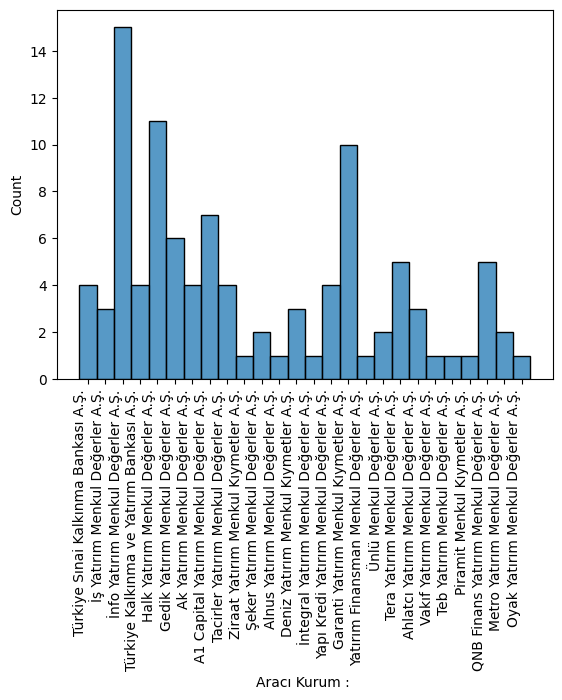

In [27]:
ax = sns.histplot(data=df, x=df["Aracı Kurum : "]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

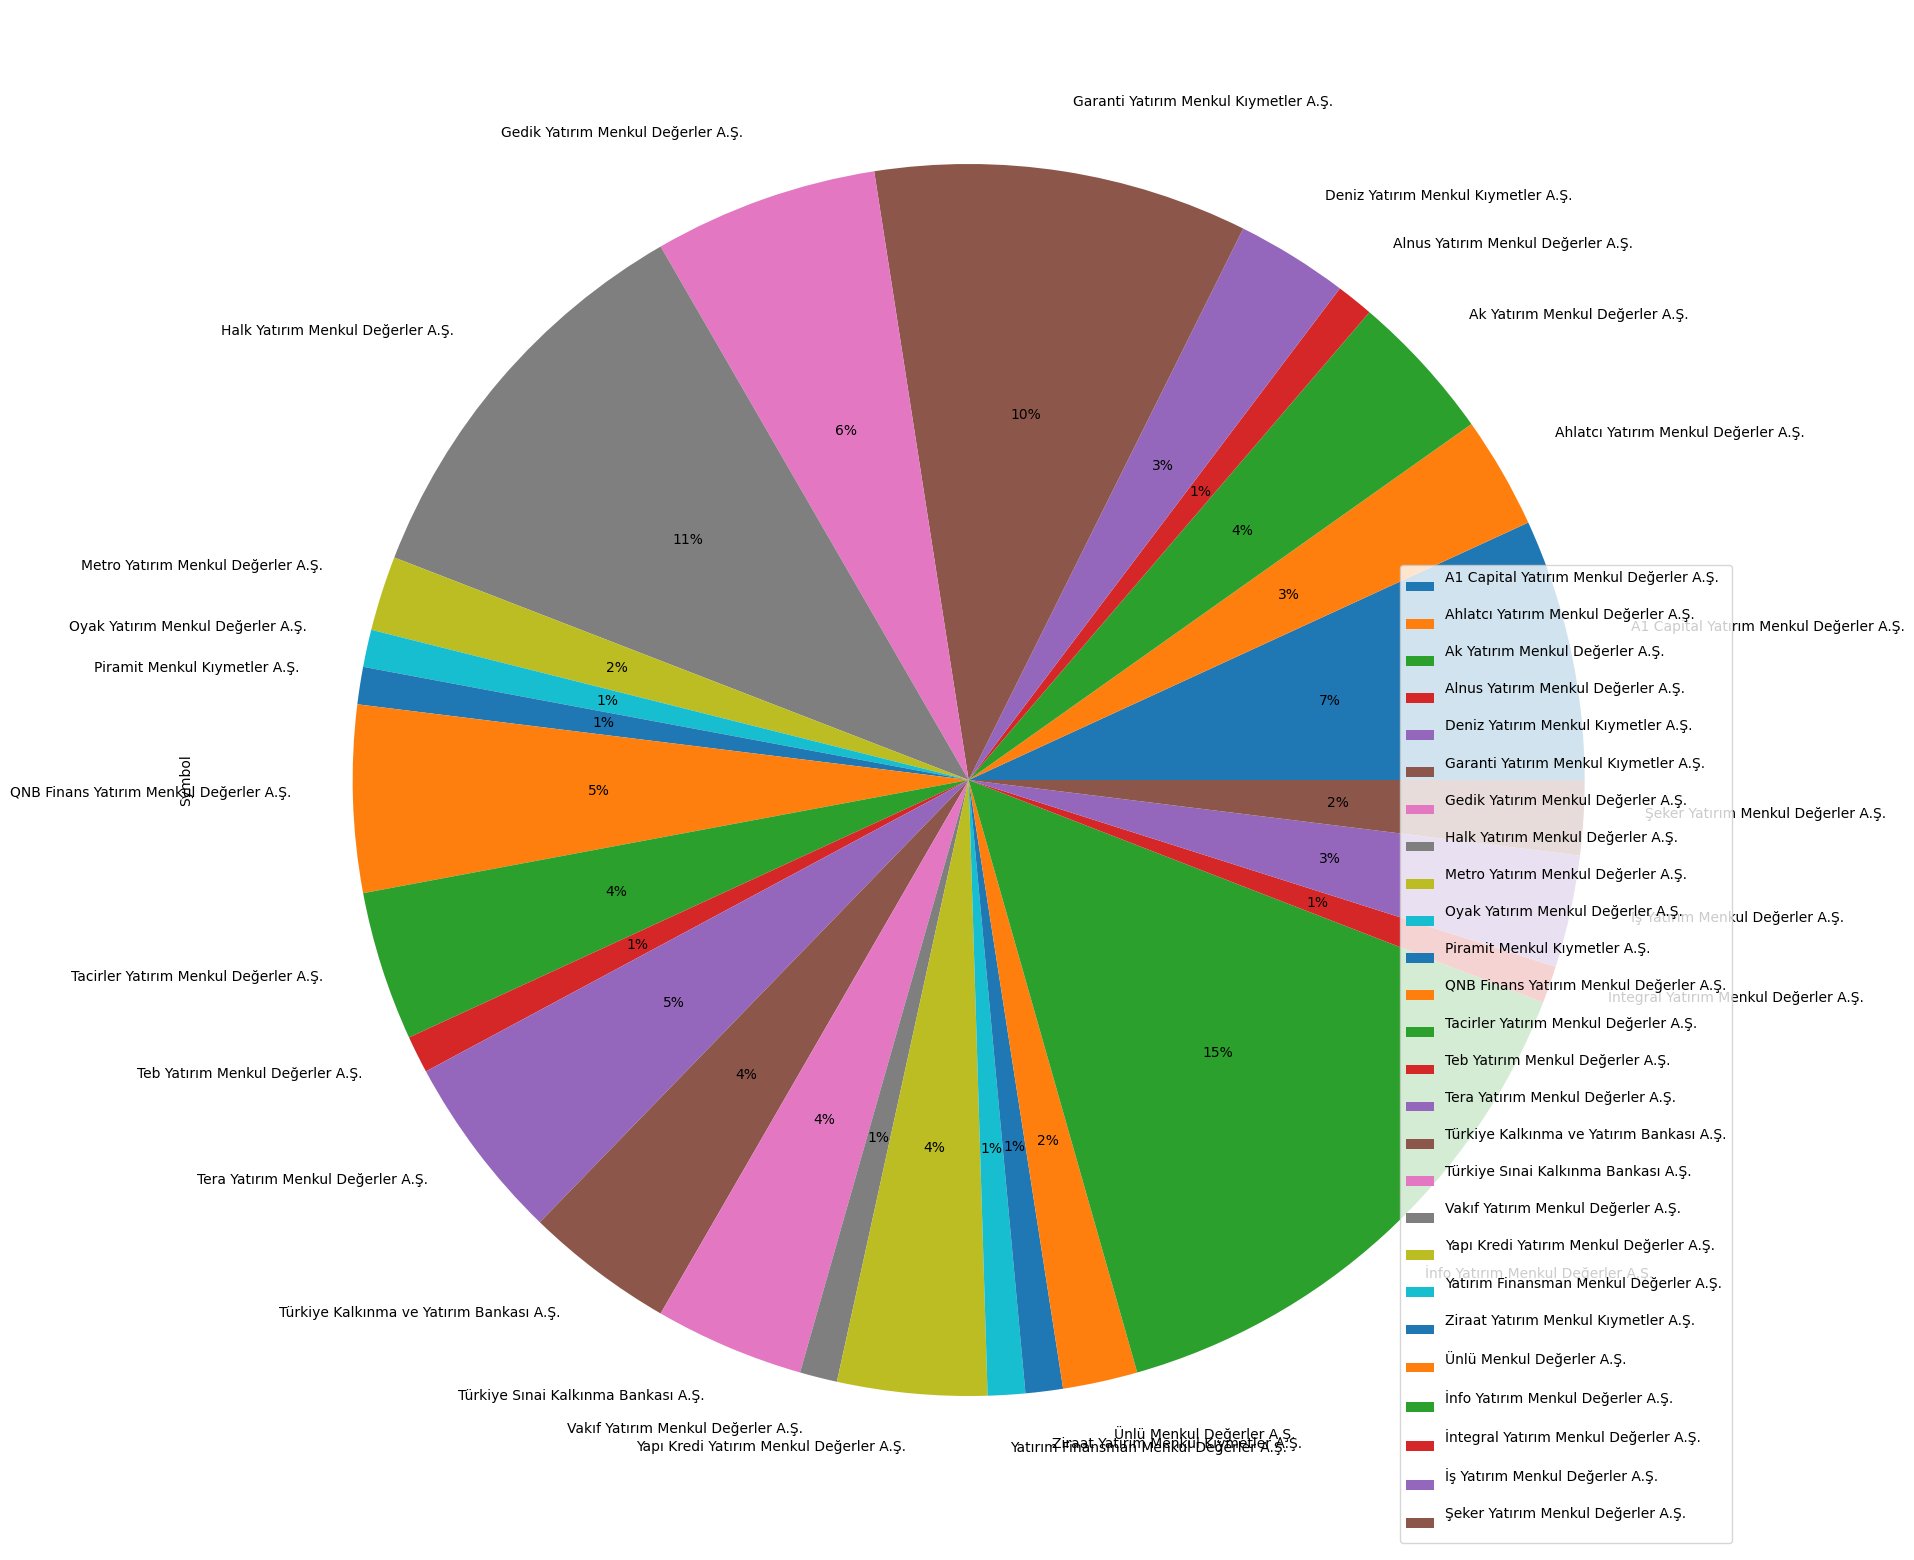

In [28]:
df.groupby(['Aracı Kurum : ']).count().plot(kind='pie', y='Symbol',autopct='%1.0f%%',figsize=(20,20));

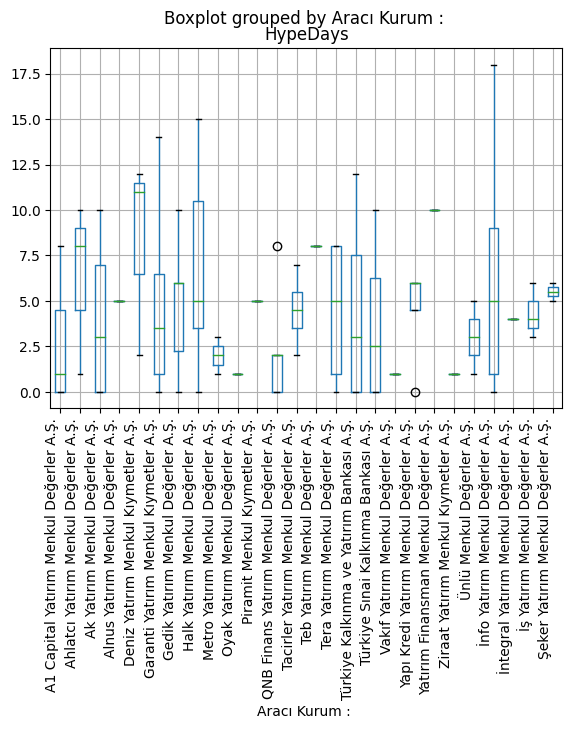

In [29]:
df.boxplot(column='HypeDays', by='Aracı Kurum : ', rot=90);

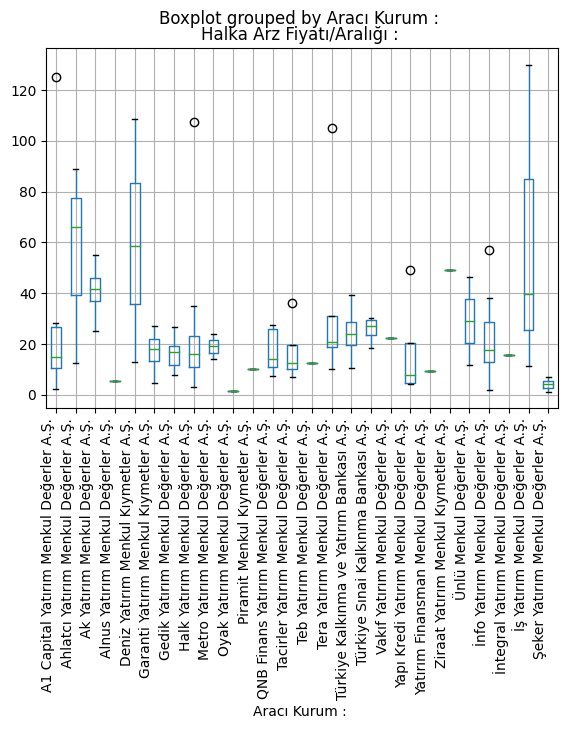

In [30]:
df.boxplot(column='Halka Arz Fiyatı/Aralığı : ', by='Aracı Kurum : ', rot=90);

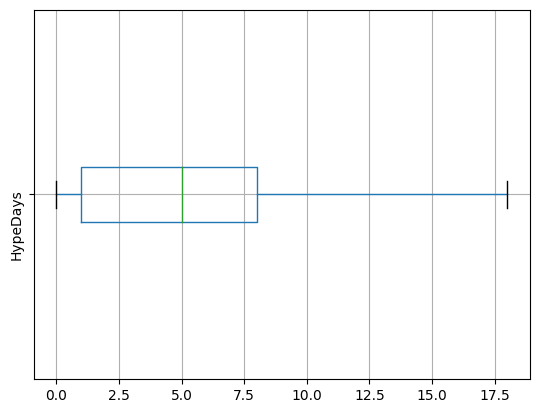

In [31]:
df.boxplot(column='HypeDays', rot=90, vert=False, grid=True);

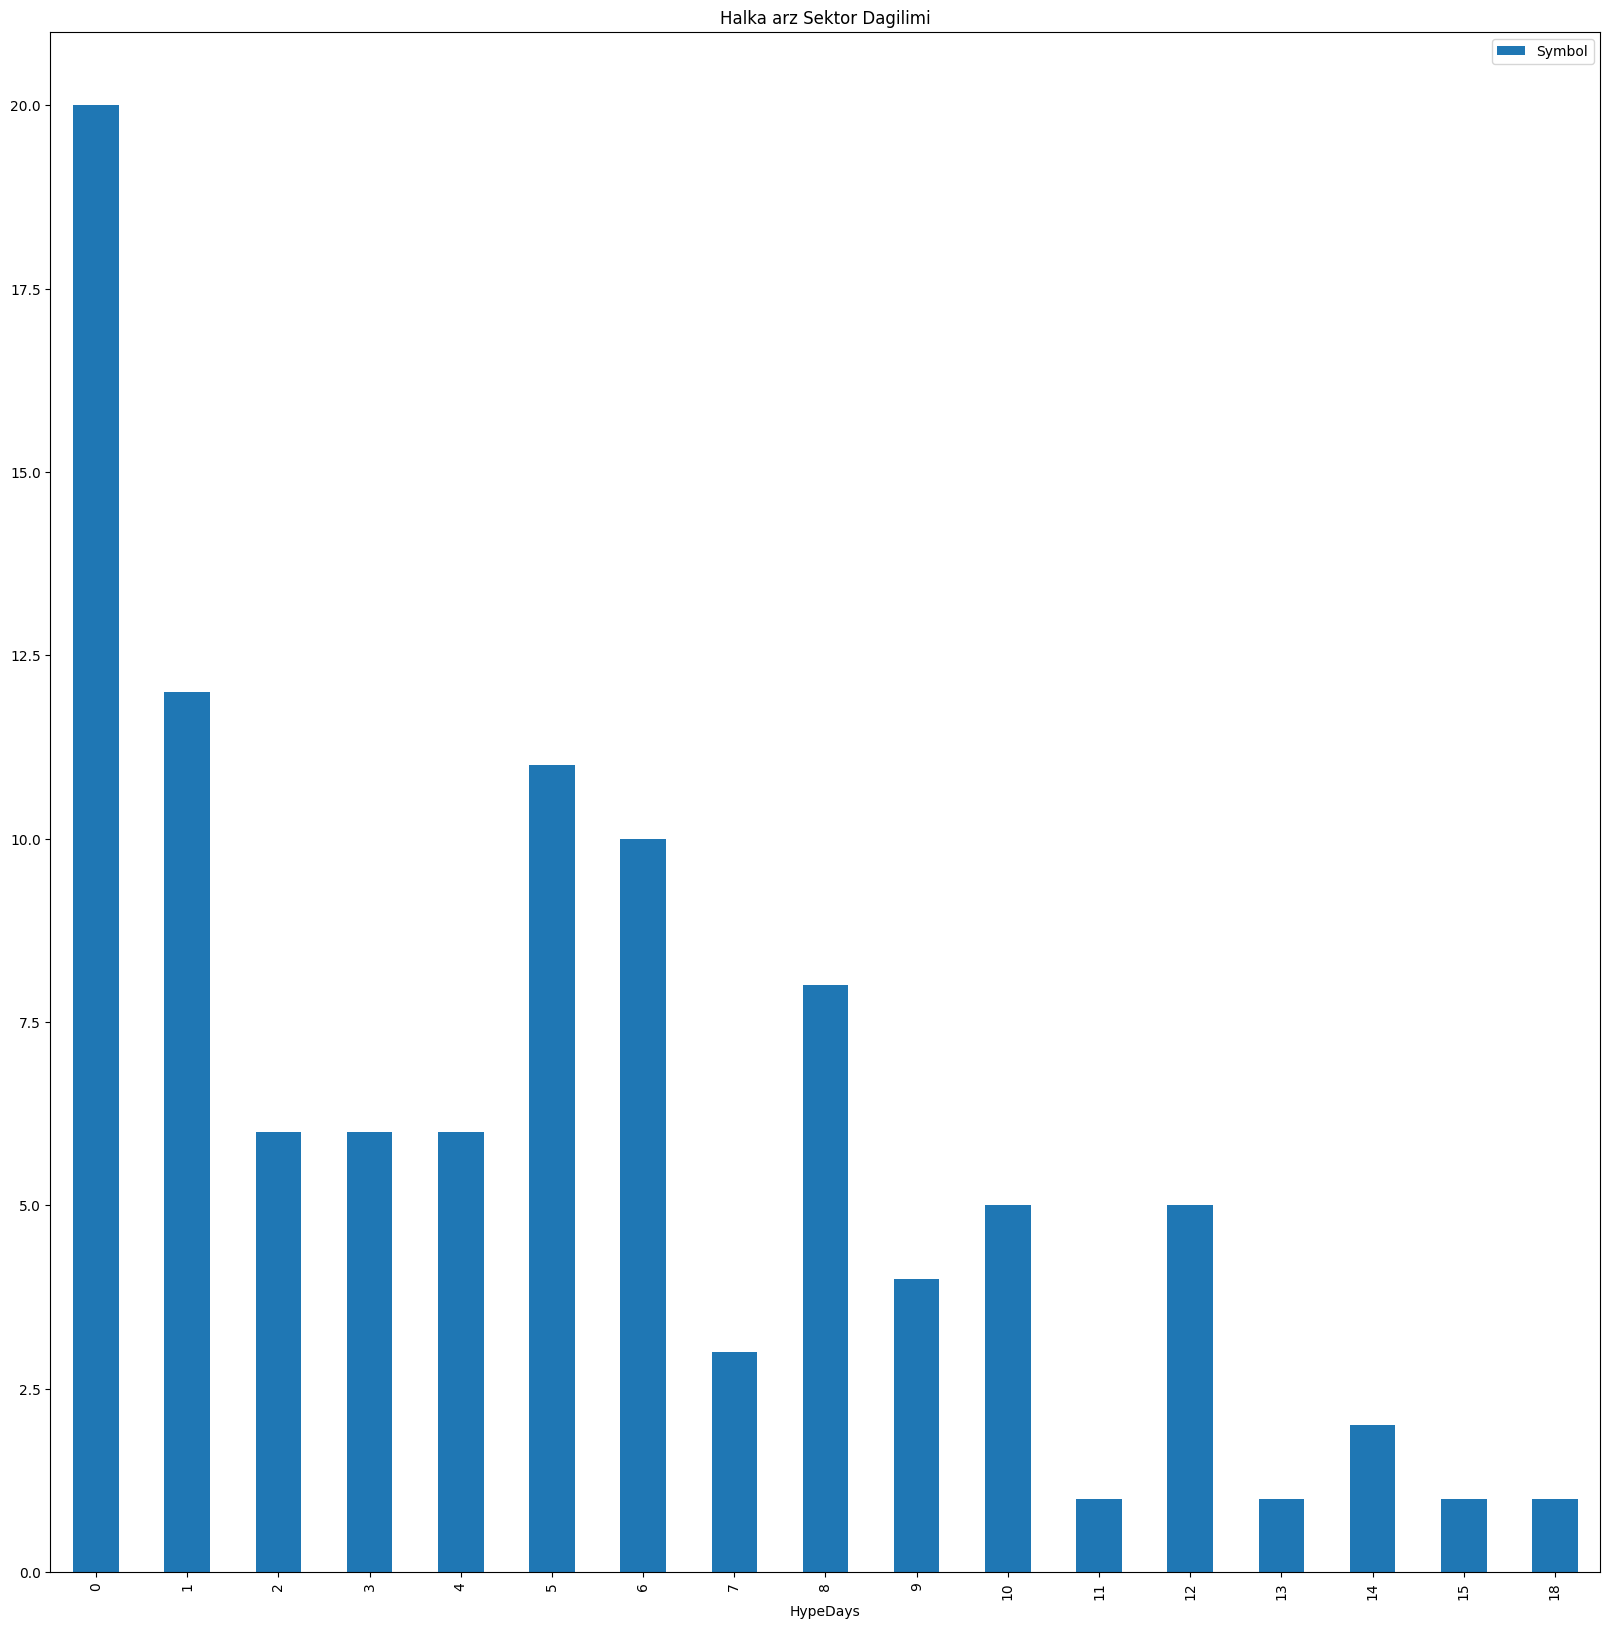

In [90]:
df.groupby(["HypeDays"]).count().plot(kind='bar', y='Symbol',figsize=(20,20), title='HypeDays Count');

<Axes: >

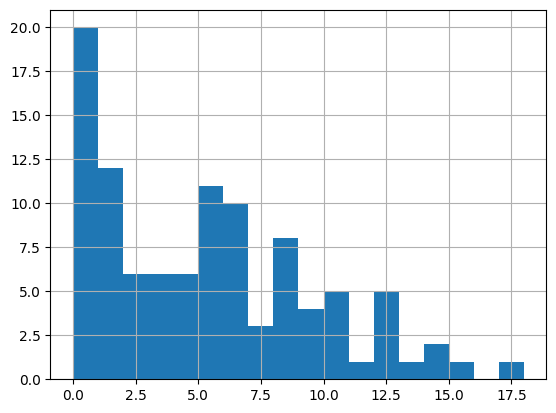

In [32]:
df['HypeDays'].hist(bins=int(df['HypeDays'].max()))

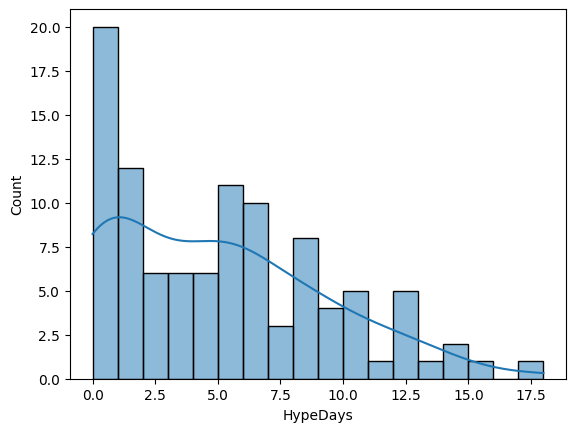

In [33]:
sns.histplot(data=df, x=df["HypeDays"], bins=int(df['HypeDays'].max()), kde=True); # This looks much better.

In [37]:
bins = [0, 10., 20., 30., 40., 50., 60., 70., 80., 90., 100.]
labels = [0, 15., 25., 35., 45., 55., 65., 75., 85., 95.]
df['New_Bireysel_Oran'] = pd.cut(df['Bireysel_Oran'], bins=bins, labels=labels)

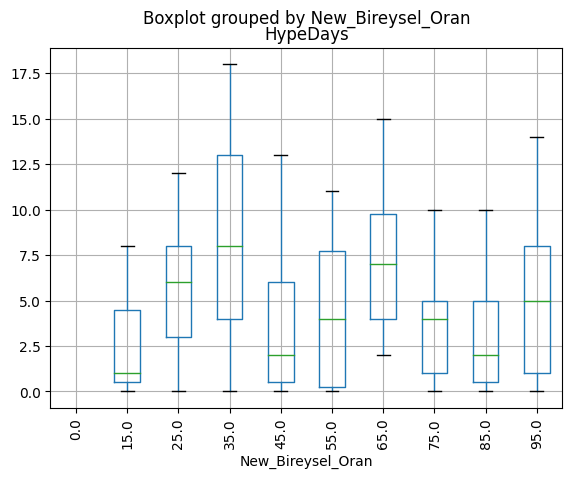

In [35]:
df.boxplot(column='HypeDays', by='New_Bireysel_Oran', rot=90);

In [38]:
bins = [0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000., 9000., 10000.]
labesl = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]
df['New_Piyasa Değeri (mn $)'] = pd.cut(df['Piyasa Değeri (mn $)'], bins=bins, labels=labels)

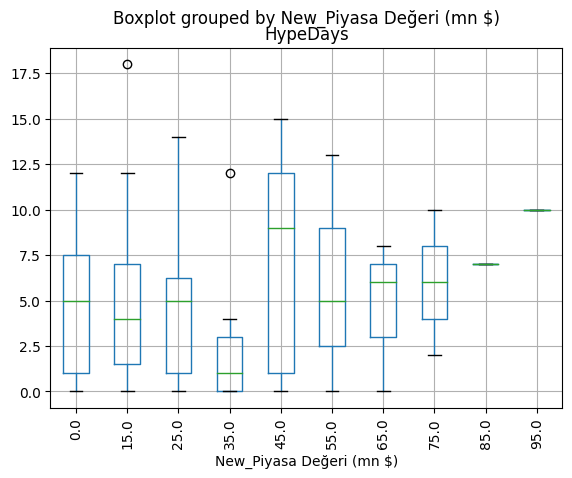

In [37]:
df.boxplot(column='HypeDays', by='New_Piyasa Değeri (mn $)', rot=90);

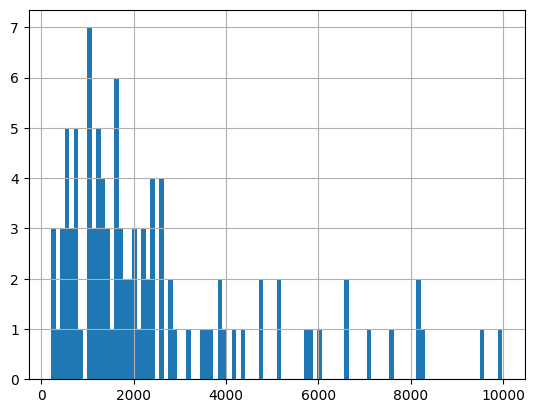

In [38]:
df['Sermaye (mn TL)'].hist(bins=100);

In [39]:
bins = [0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000., 9000., 10000.]
labesl = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]
df['New_Sermaye'] = pd.cut(df['Sermaye (mn TL)'], bins=bins, labels=labels)

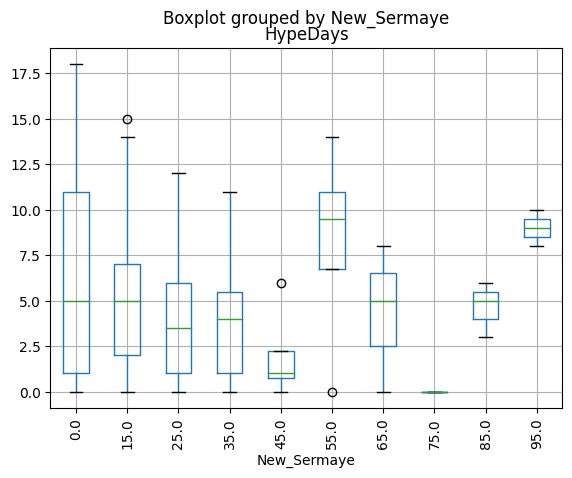

In [40]:
df.boxplot(column='HypeDays', by='New_Sermaye', rot=90);

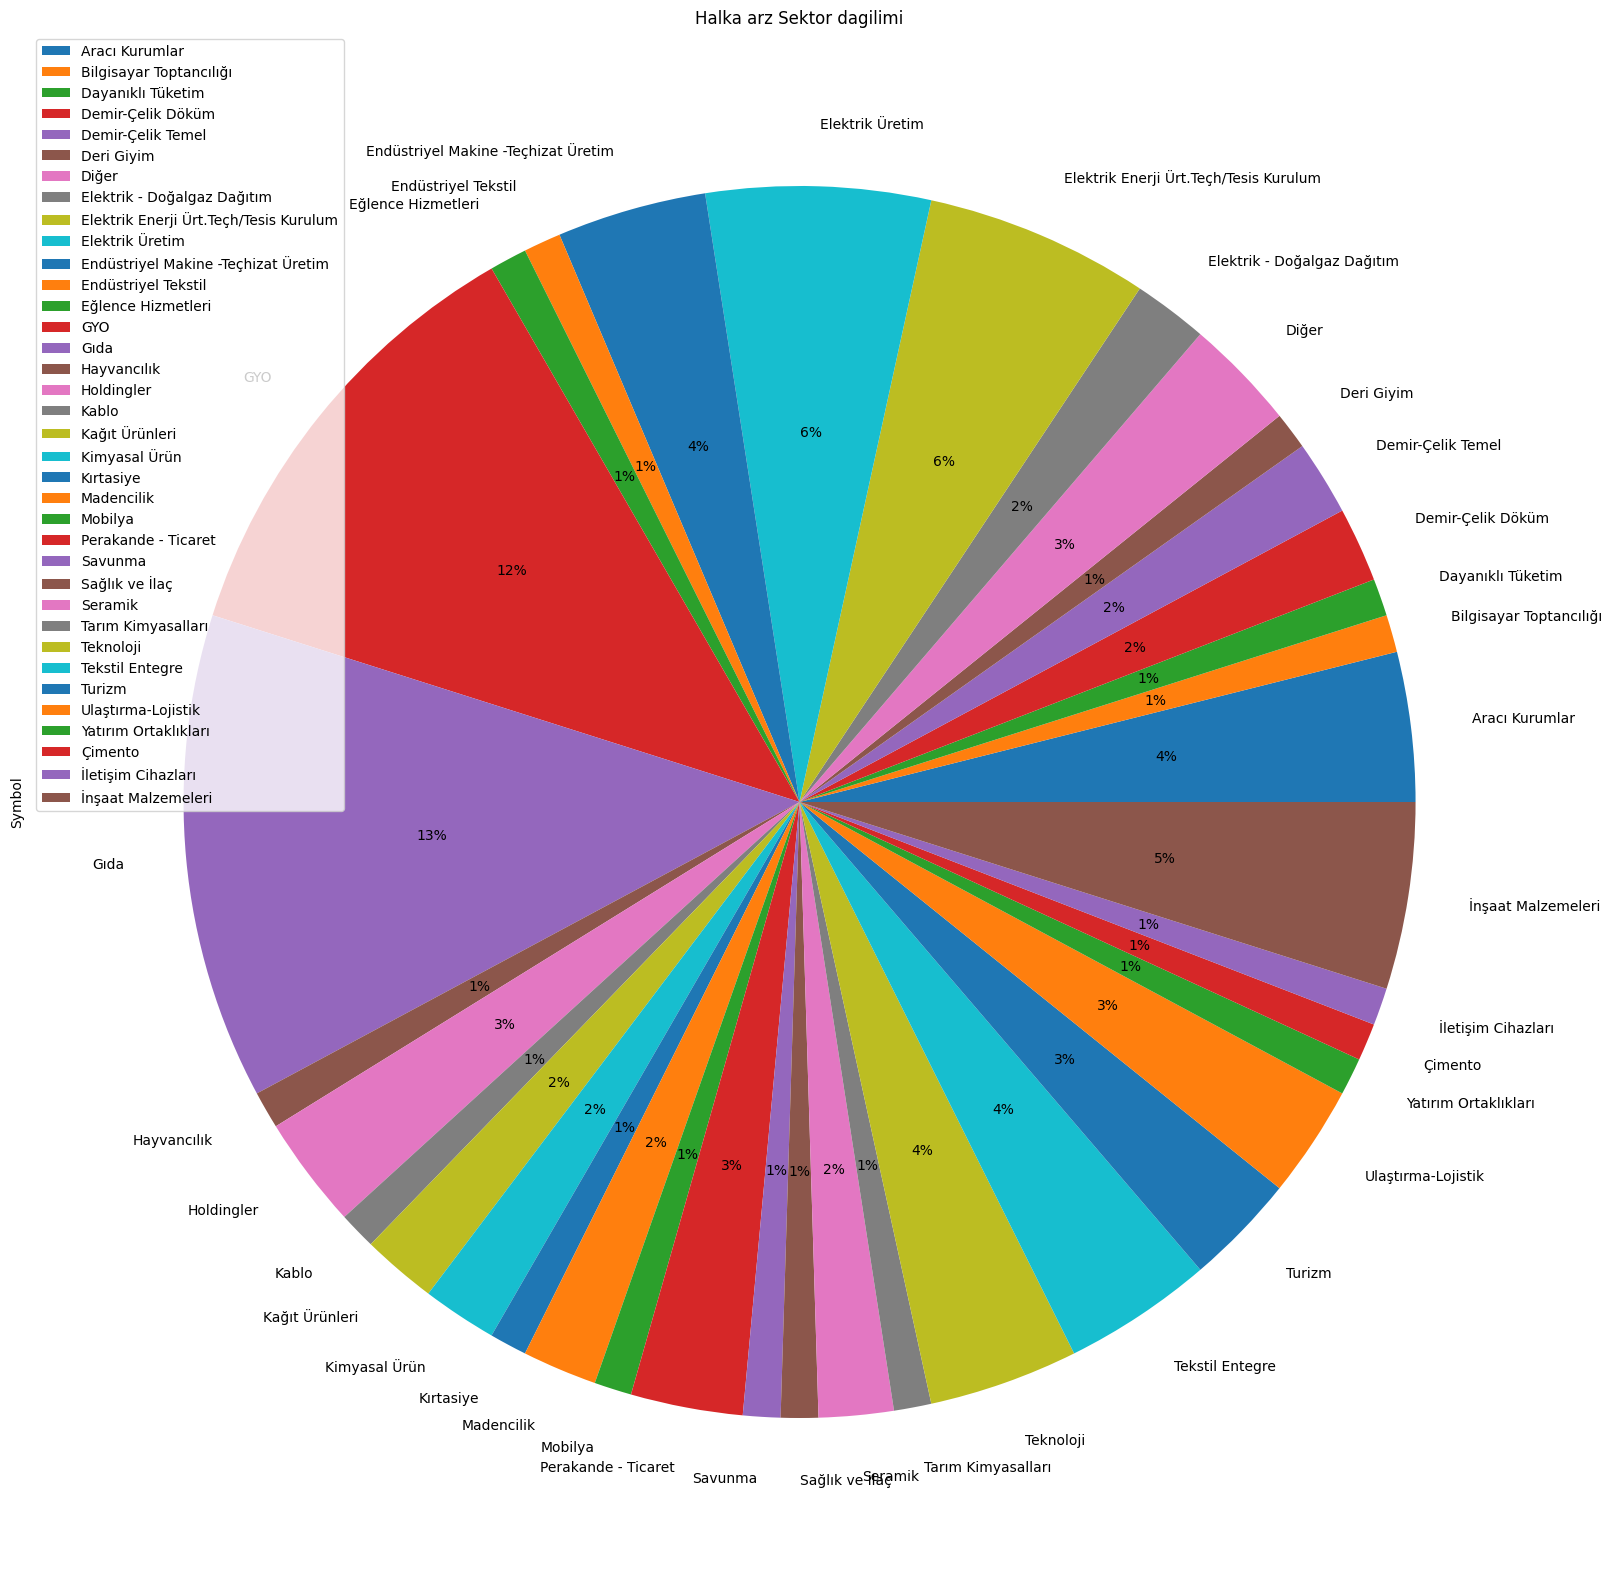

In [42]:
df.groupby(['Sektör']).count().plot(kind='pie', y='Symbol',autopct='%1.0f%%',figsize=(20,20), title='Halka arz Sektor dagilimi');

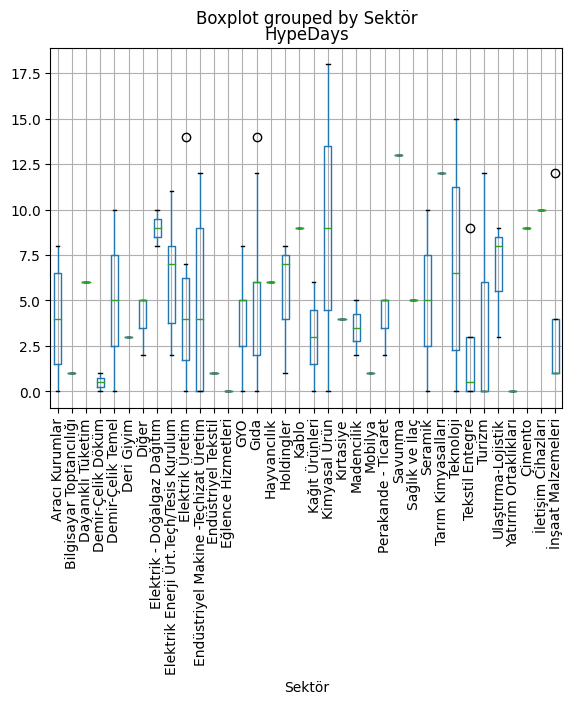

In [41]:
df.boxplot(column='HypeDays', by='Sektör', rot=90);

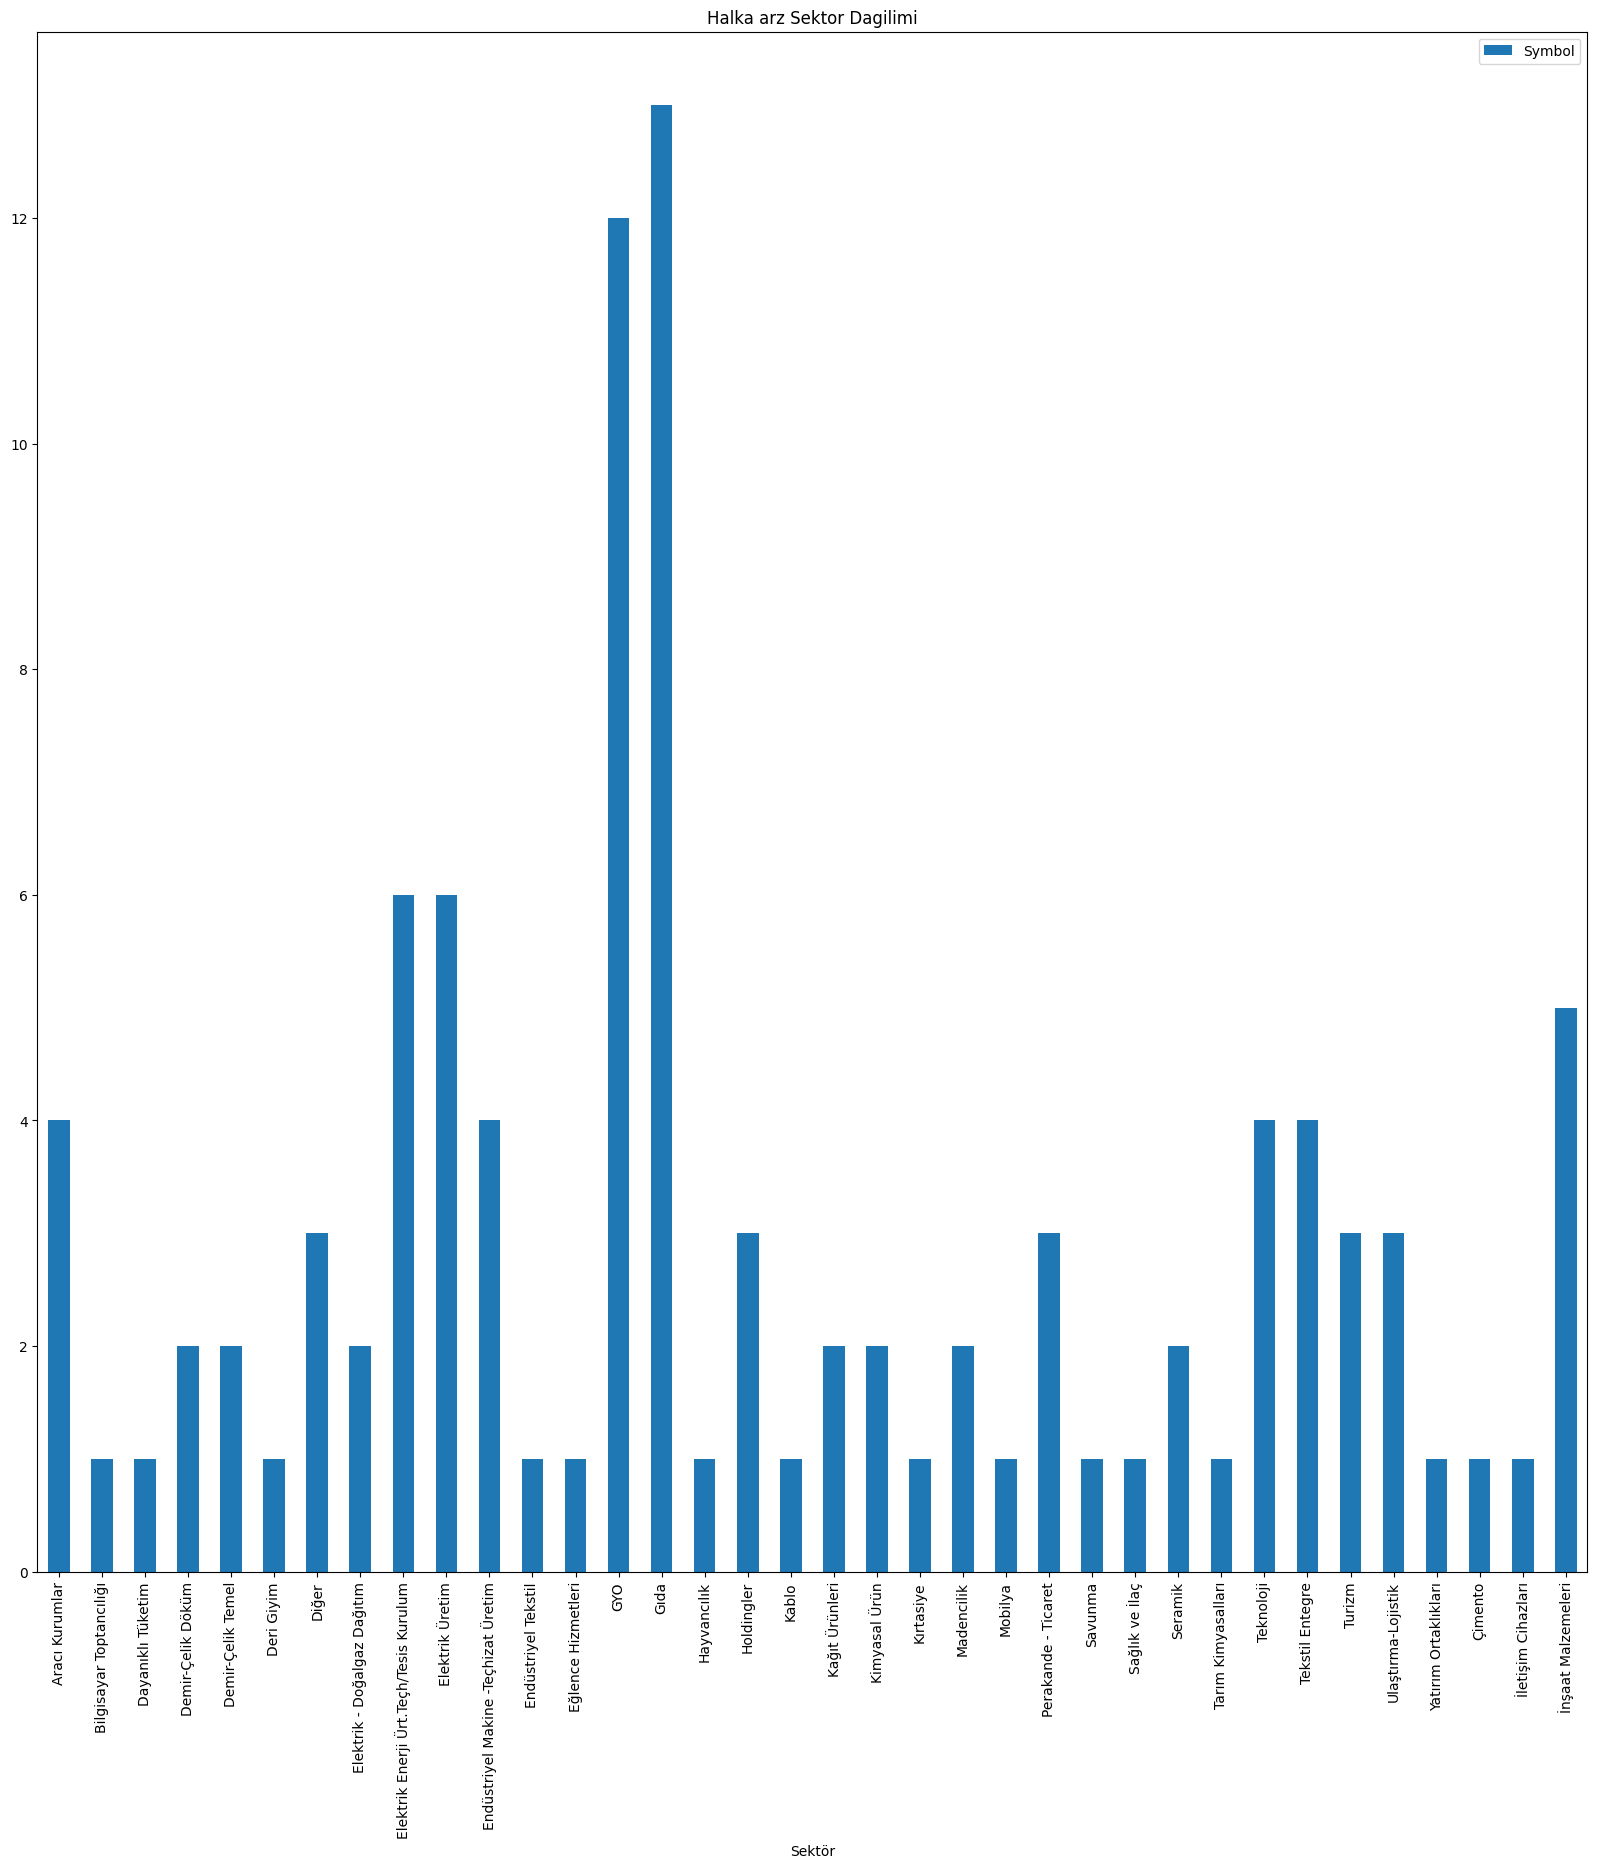

In [43]:
df.groupby(['Sektör']).count().plot(kind='bar', y='Symbol',figsize=(20,20), title='Halka arz Sektor Dagilimi');

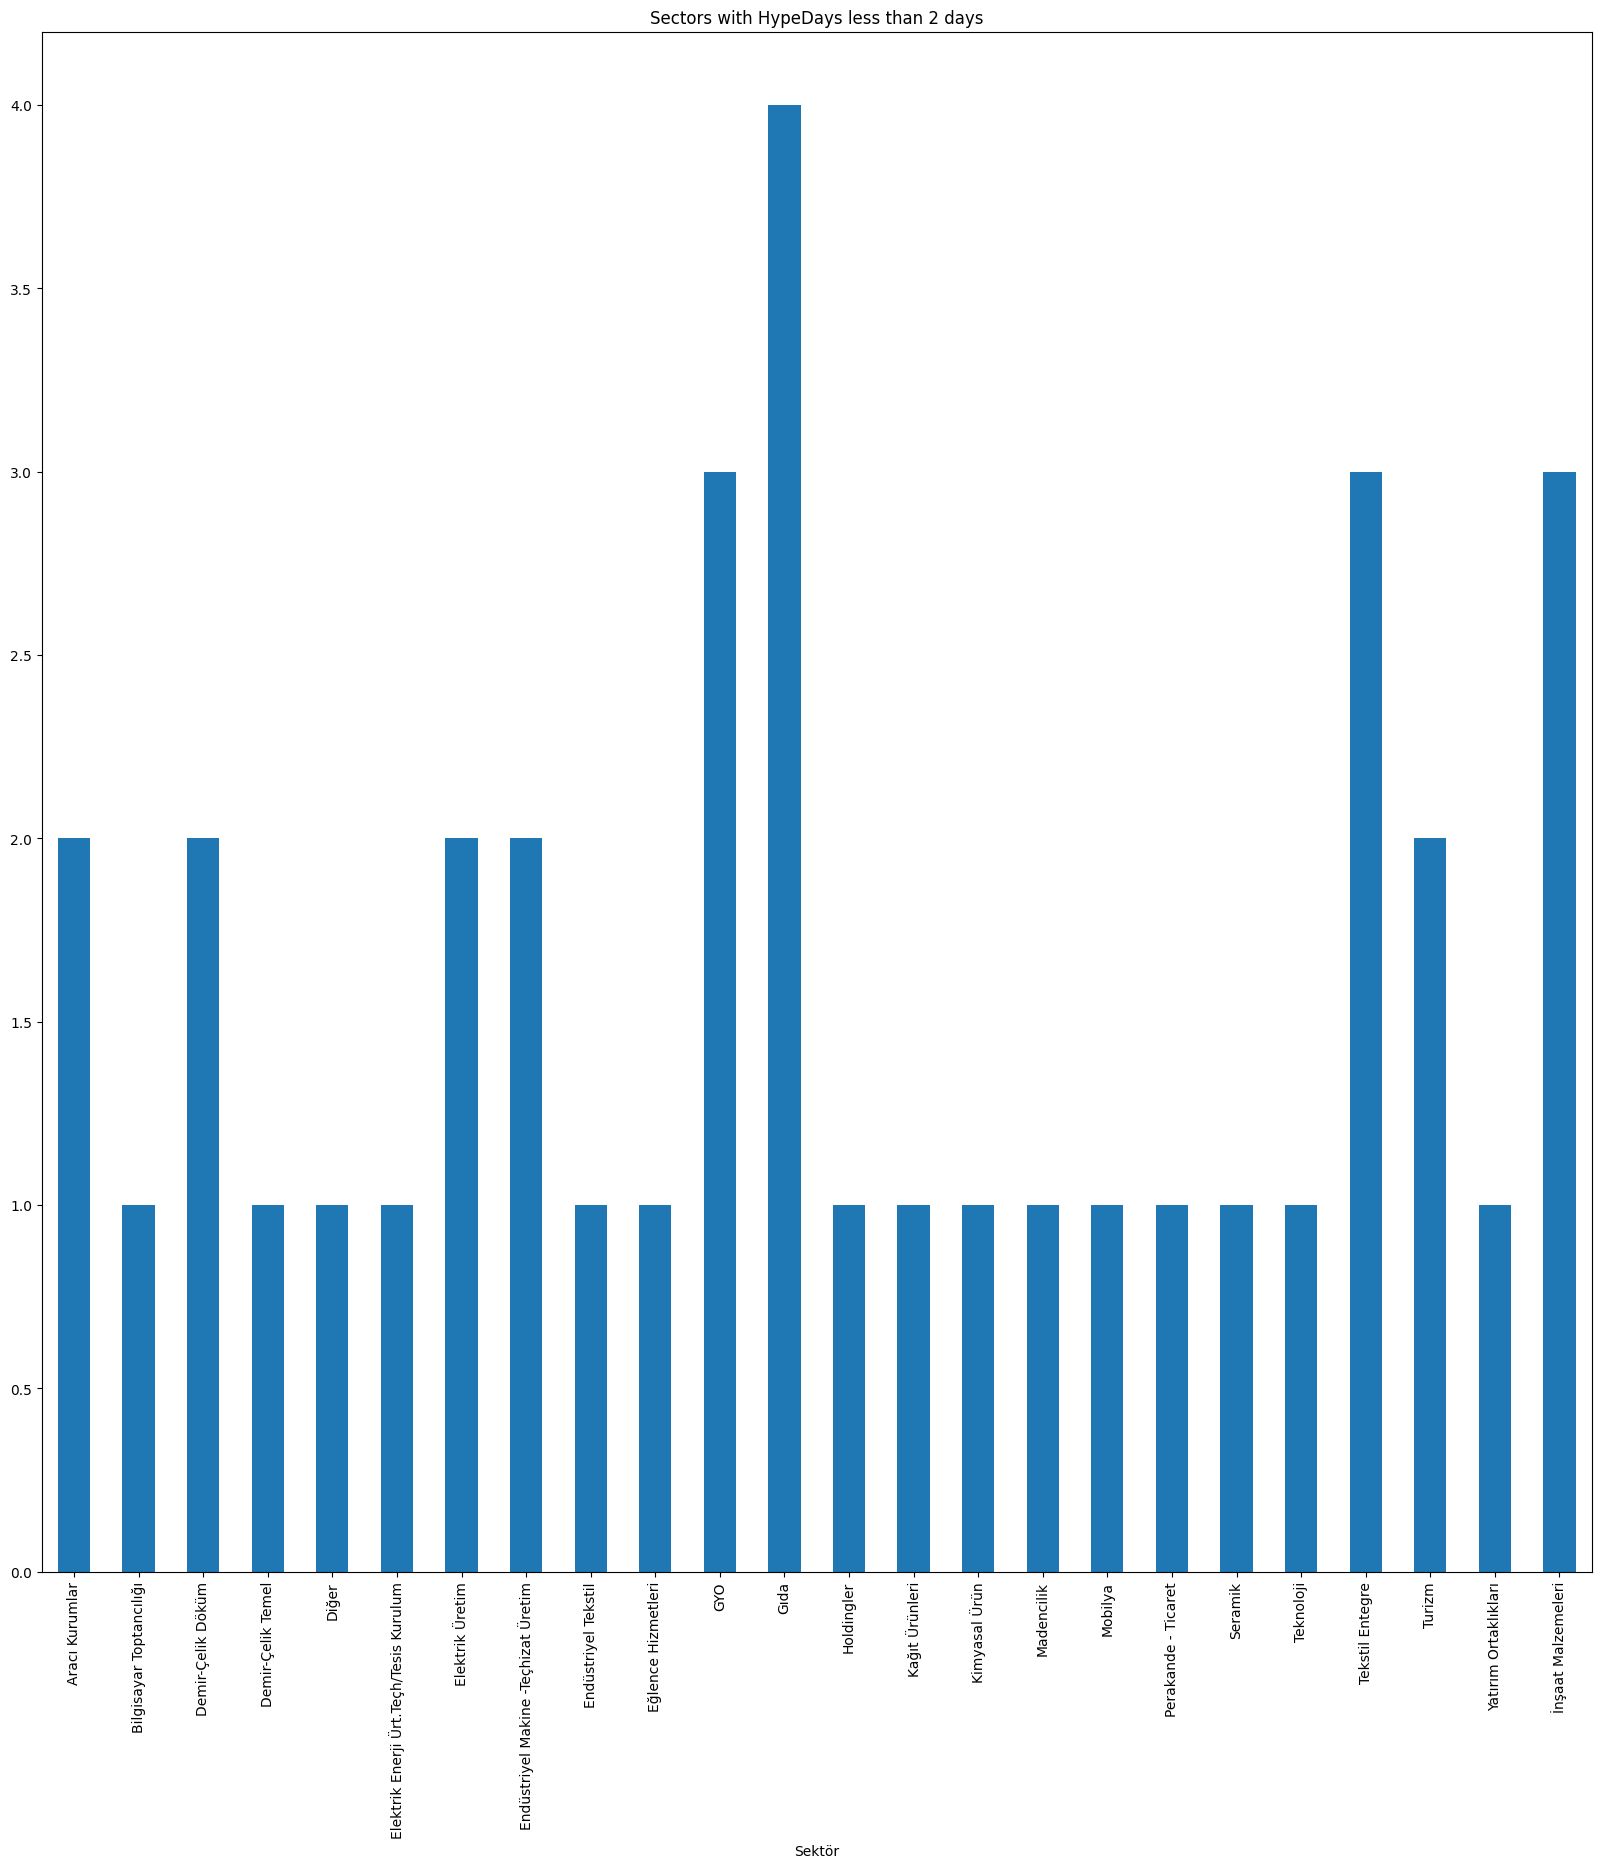

In [100]:
df[(df["HypeDays"] <= 2)].groupby(["Sektör"]).count().plot(kind='bar', y='Symbol', legend=False,figsize=(20,20), title='Sectors with HypeDays less than 2 days');

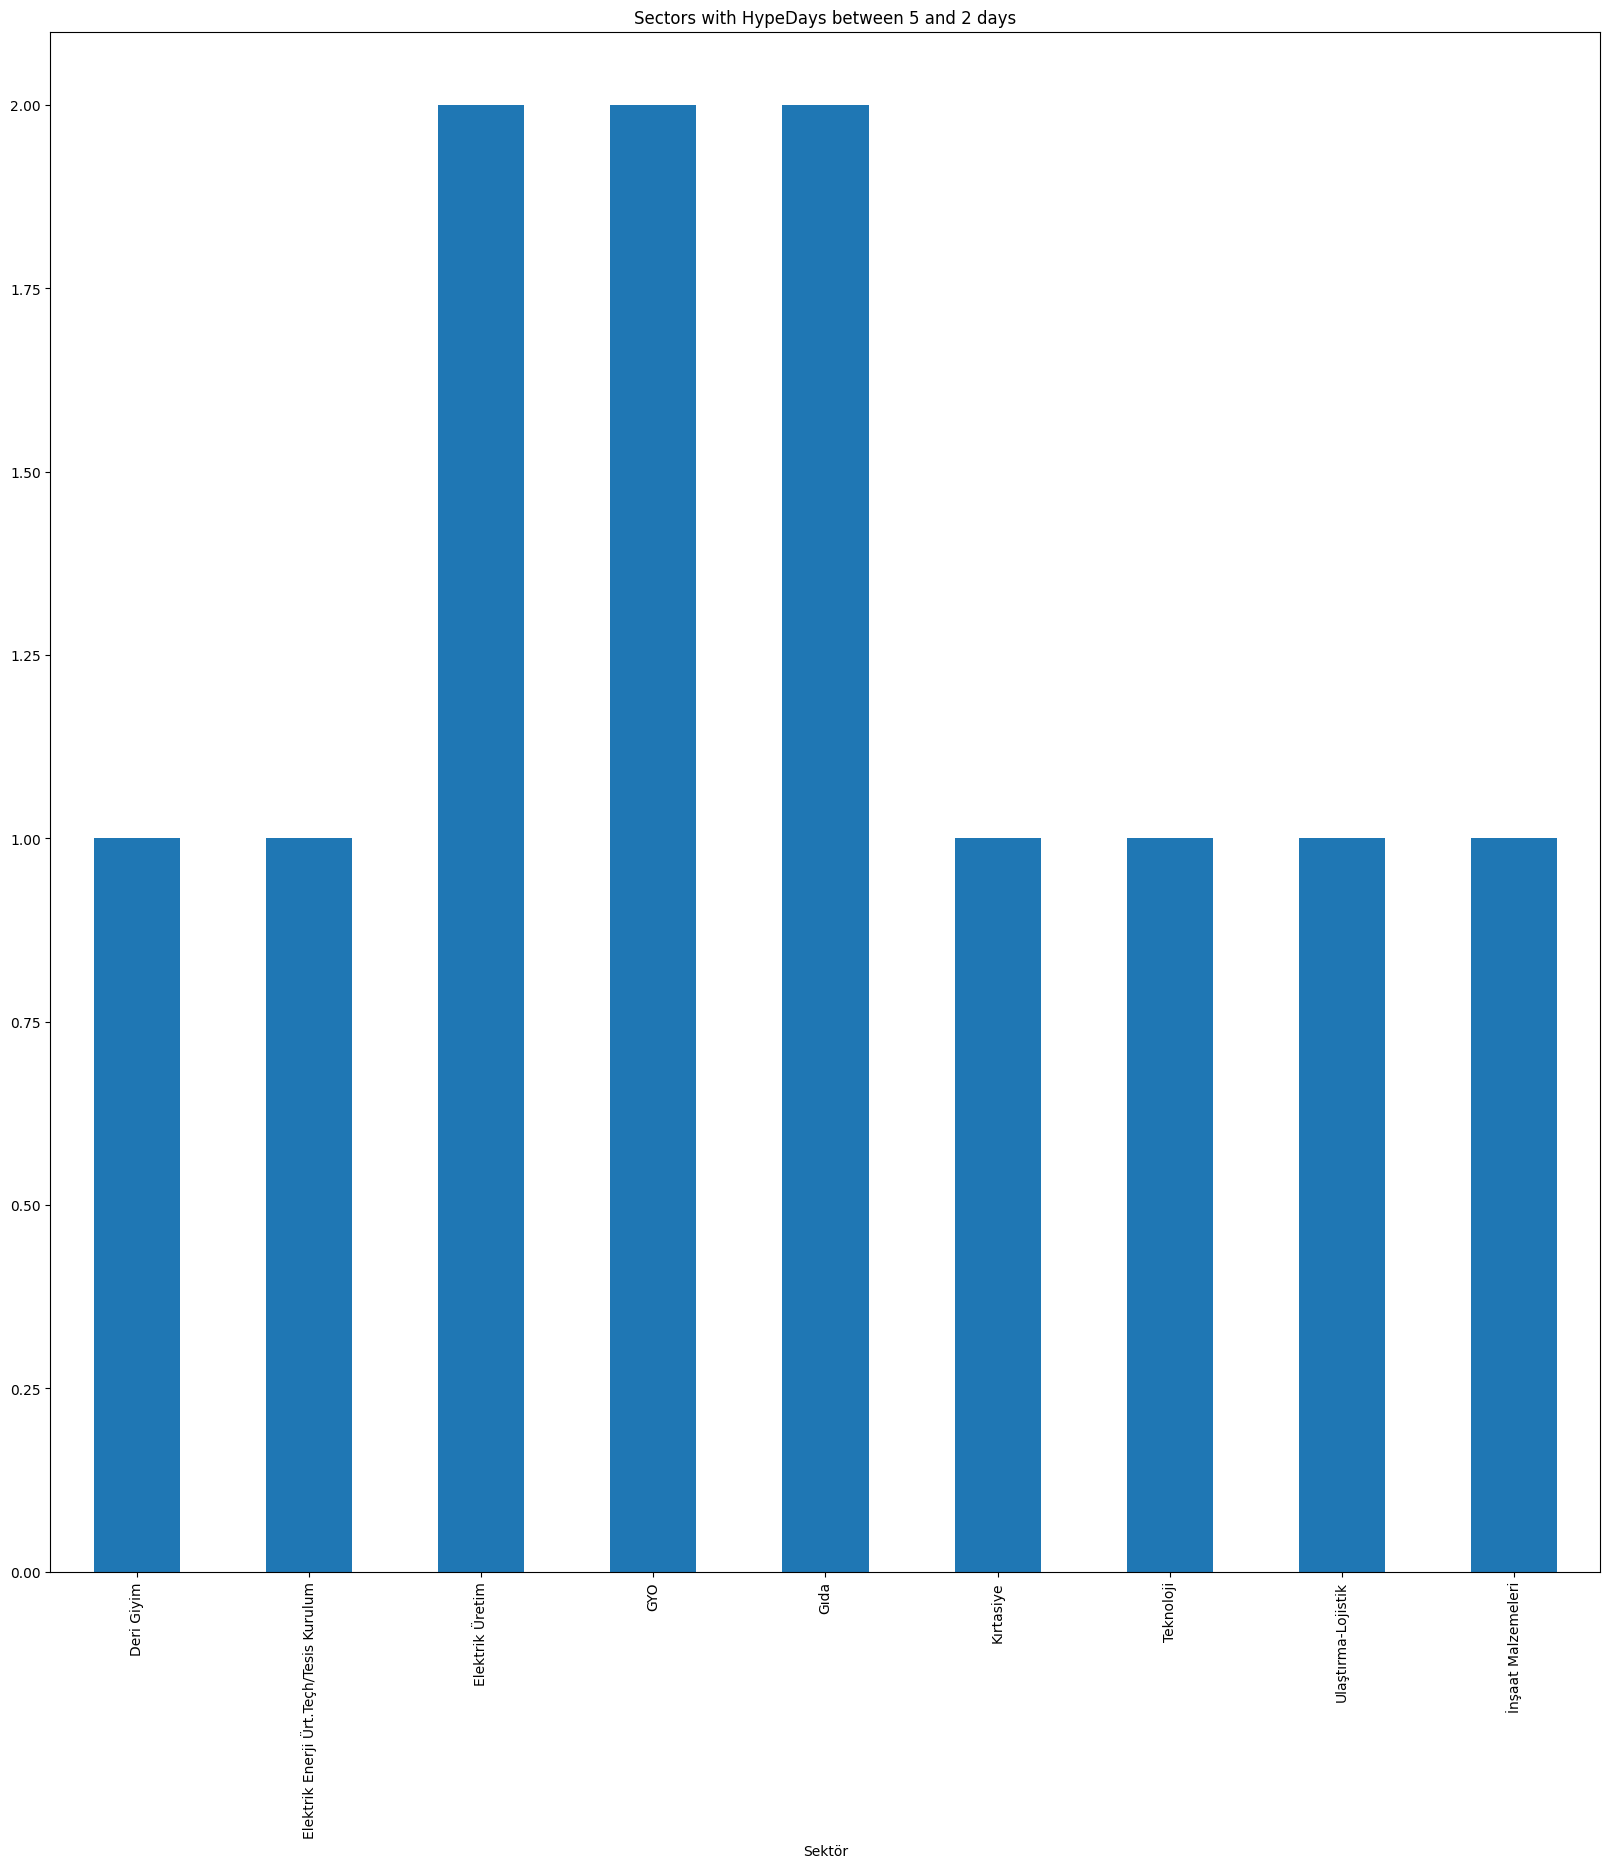

In [102]:
df[(df["HypeDays"] > 2) & (df["HypeDays"] < 5)].groupby(["Sektör"]).count().plot(kind='bar', y='Symbol', legend=False,figsize=(20,20), title='Sectors with HypeDays between 5 and 2 days');

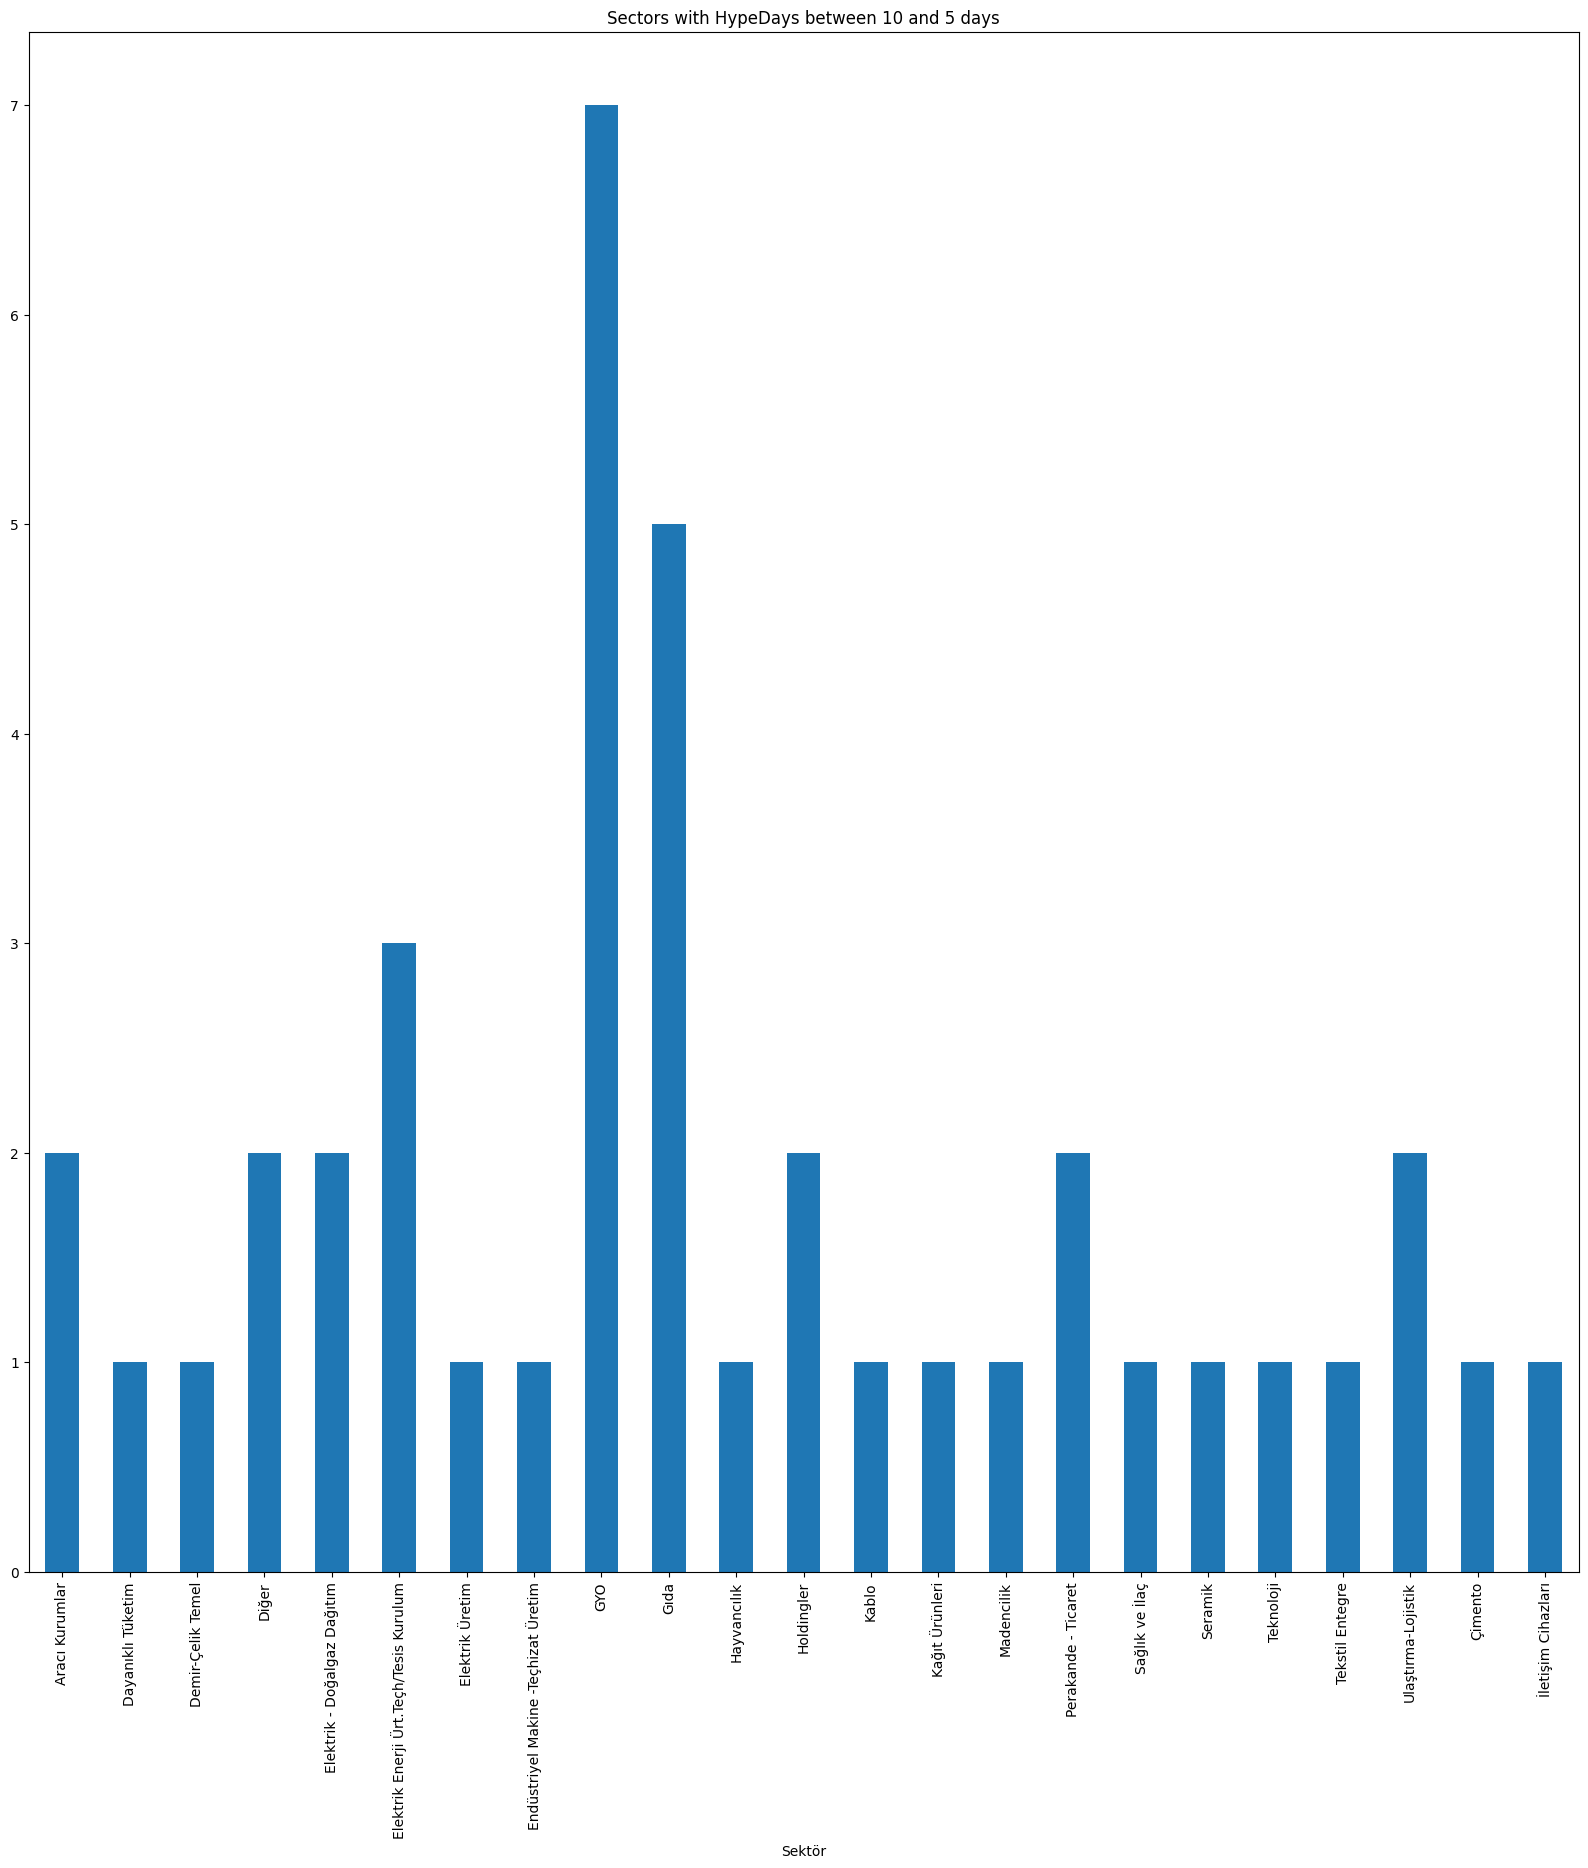

In [107]:
df[(df["HypeDays"] >= 5) & (df["HypeDays"] <= 10)].groupby(["Sektör"]).count().plot(kind='bar', y='Symbol', legend=False,figsize=(20,20), title='Sectors with HypeDays between 10 and 5 days');

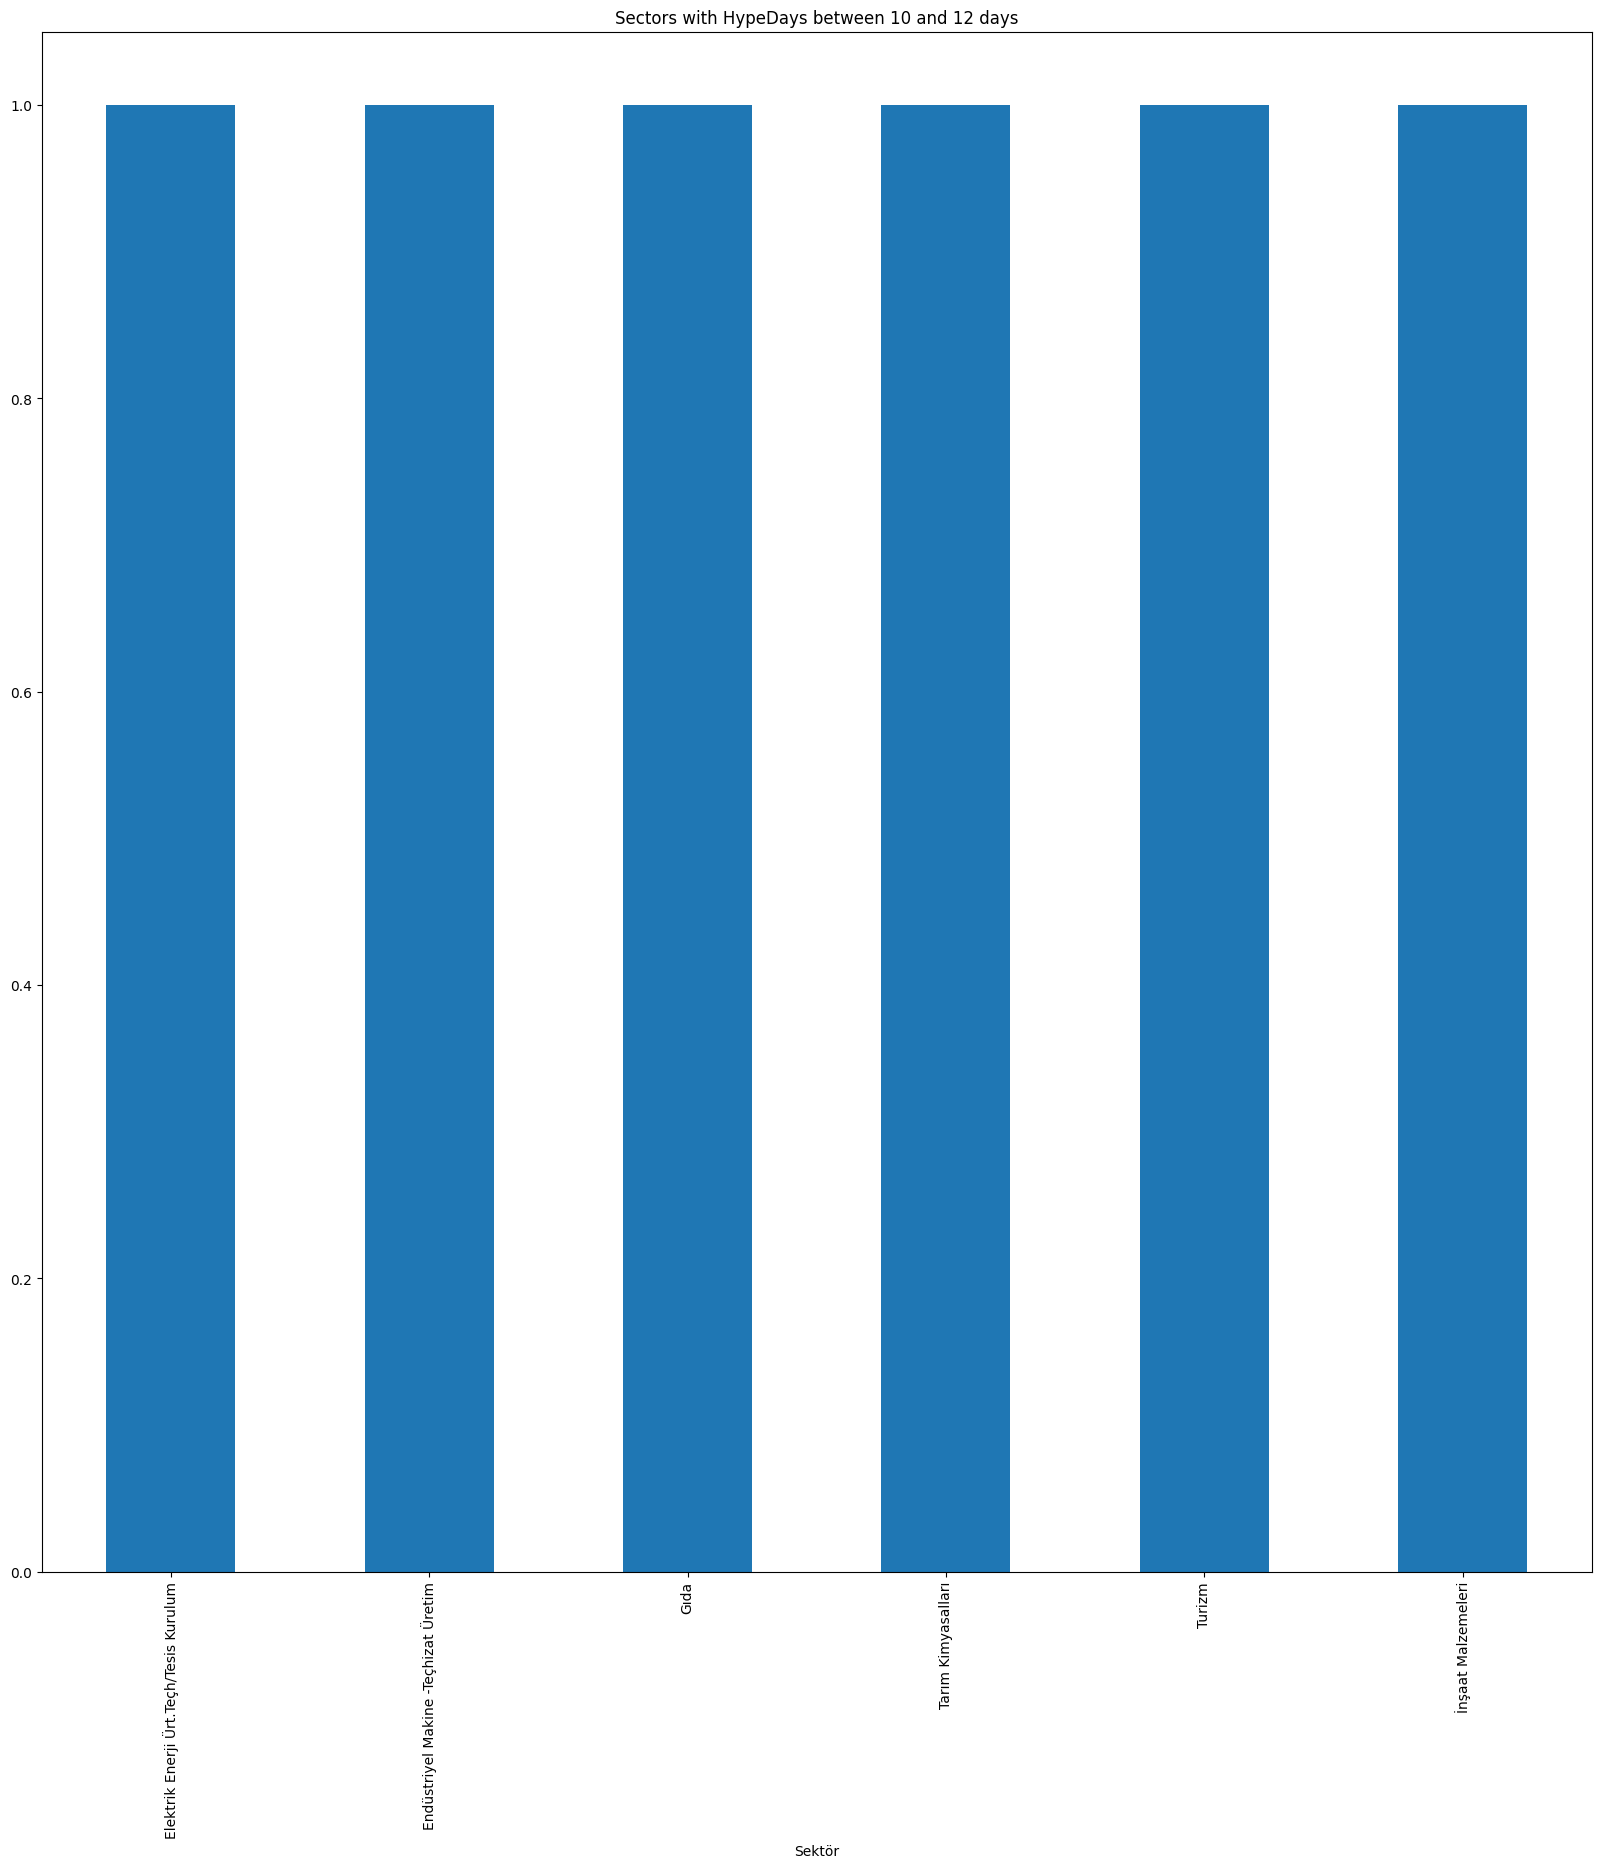

In [110]:
df[(df["HypeDays"] > 10) & (df["HypeDays"] <= 12)].groupby(["Sektör"]).count().plot(kind='bar', y='Symbol', legend=False,figsize=(20,20), title='Sectors with HypeDays between 10 and 12 days');

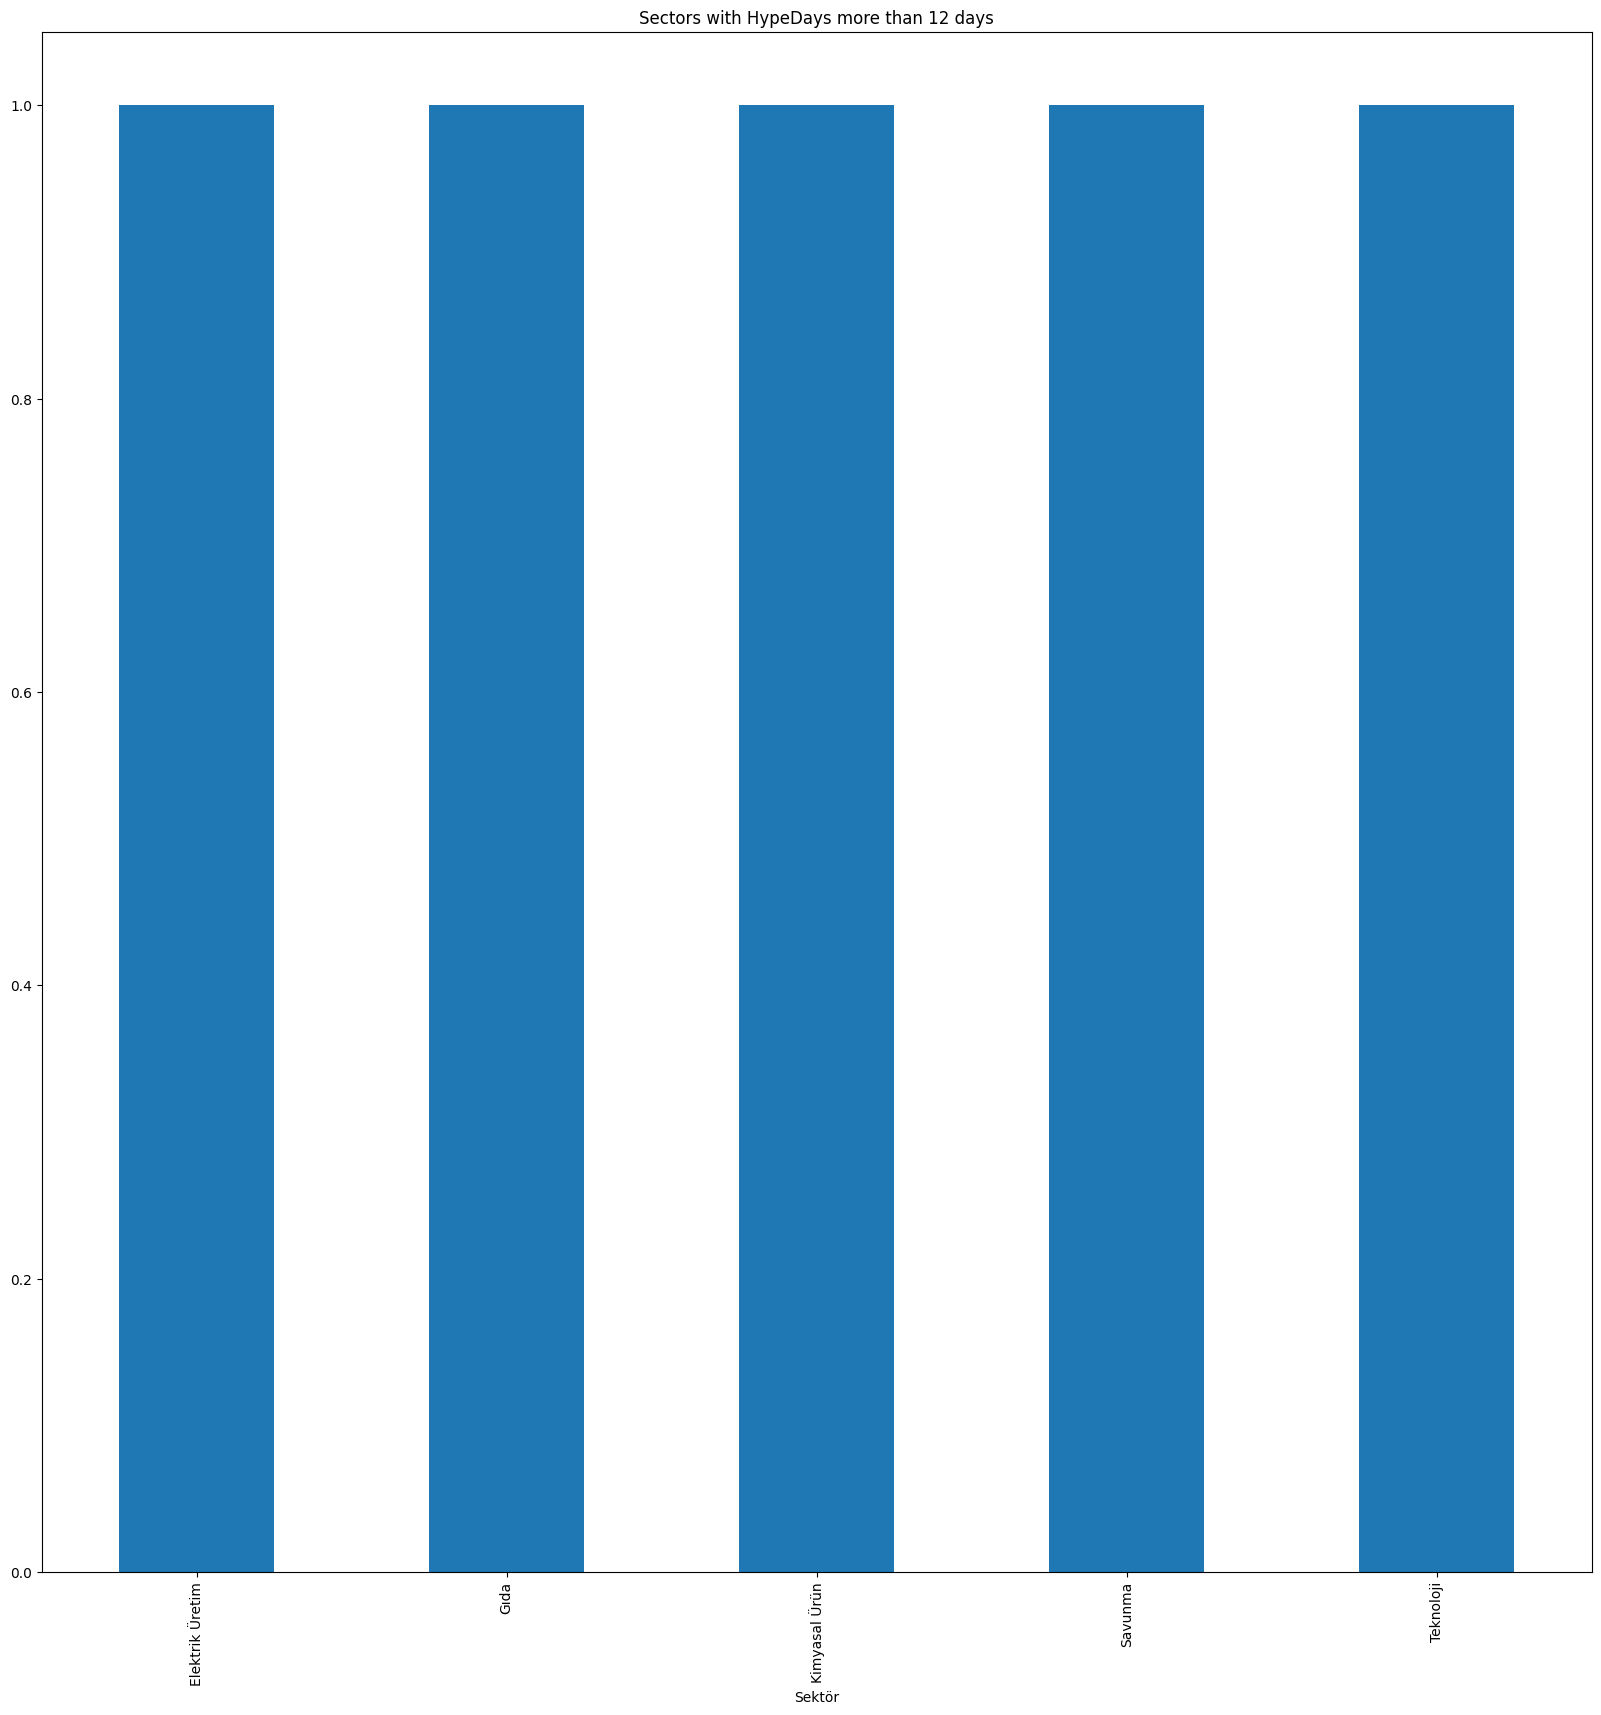

In [111]:
df[(df["HypeDays"] > 12)].groupby(["Sektör"]).count().plot(kind='bar', y='Symbol', legend=False,figsize=(20,20), title='Sectors with HypeDays more than 12 days');

In [40]:
df.columns

Index(['Halka Arz Fiyatı/Aralığı : ', 'Dağıtım Yöntemi : ', 'Pay : ', 'Symbol',
       'Pazar : ', 'Aracı Kurum : ', 'Bist İlk İşlem Tarihi : ', 'HypeDays',
       'Yurtici_Kisi', 'Yurtici_Lot', 'Yurtdisi_Kisi', 'Yurtdisi_Lot',
       'Yurtici_Kurumsal', 'Yurtici_Kurumsal_Lot', 'Yurtdisi_Kurumsal',
       'Yurtdisi_Kurumsal_Lot', 'Sirket_Calisanlari_Kisi',
       'Sirket_Calisanlari_Lot', 'Yuksek Başvurulu_Kisi',
       'Yuksek Başvurulu_Lot', 'Yuksek Başvurulu Bireysel_Kisi',
       'Yuksek Başvurulu Bireysel_Lot', 'Total_Lot', 'Total_Kisi',
       'Kurumsal_Oran', 'Bireysel_Oran', 'Bireysel_Kisi_Oran',
       'Kurumsal_Kisi_Oran', 'Sektör', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)',
       'New_Bireysel_Oran', 'New_Piyasa Değeri (mn $)', 'New_Sermaye'],
      dtype='object')

In [45]:
df['Bireysel_Oran']

0      60.000000
1      80.000000
2      99.997760
3      49.000000
4      80.000000
         ...    
97     20.000001
98     91.759032
99     85.995356
100    99.979952
101    50.000000
Name: Bireysel_Oran, Length: 102, dtype: float64

In [46]:
df.head(1)

,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,Symbol,Pazar :,Aracı Kurum :,Bist İlk İşlem Tarihi :,HypeDays,Yurtici_Kisi,Yurtici_Lot,...,Bireysel_Kisi_Oran,Kurumsal_Kisi_Oran,Sektör,Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL),New_Bireysel_Oran,New_Piyasa Değeri (mn $),New_Sermaye
0,30.0,Eşit Dağıtım,"44,200,000 Lot",ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,2024-03-21,10.0,3198260.0,26520000.0,...,99.994185,0.005815,Teknoloji,8795.0,2701.0,400,1105.0,55.0,25.0,15.0


In [47]:
df_ = df[['Halka Arz Fiyatı/Aralığı : ', 'HypeDays', 'Total_Lot', 'Total_Kisi',
       'Kurumsal_Oran', 'Bireysel_Oran', 'Bireysel_Kisi_Oran',
       'Kurumsal_Kisi_Oran', 'Sektör', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)']]

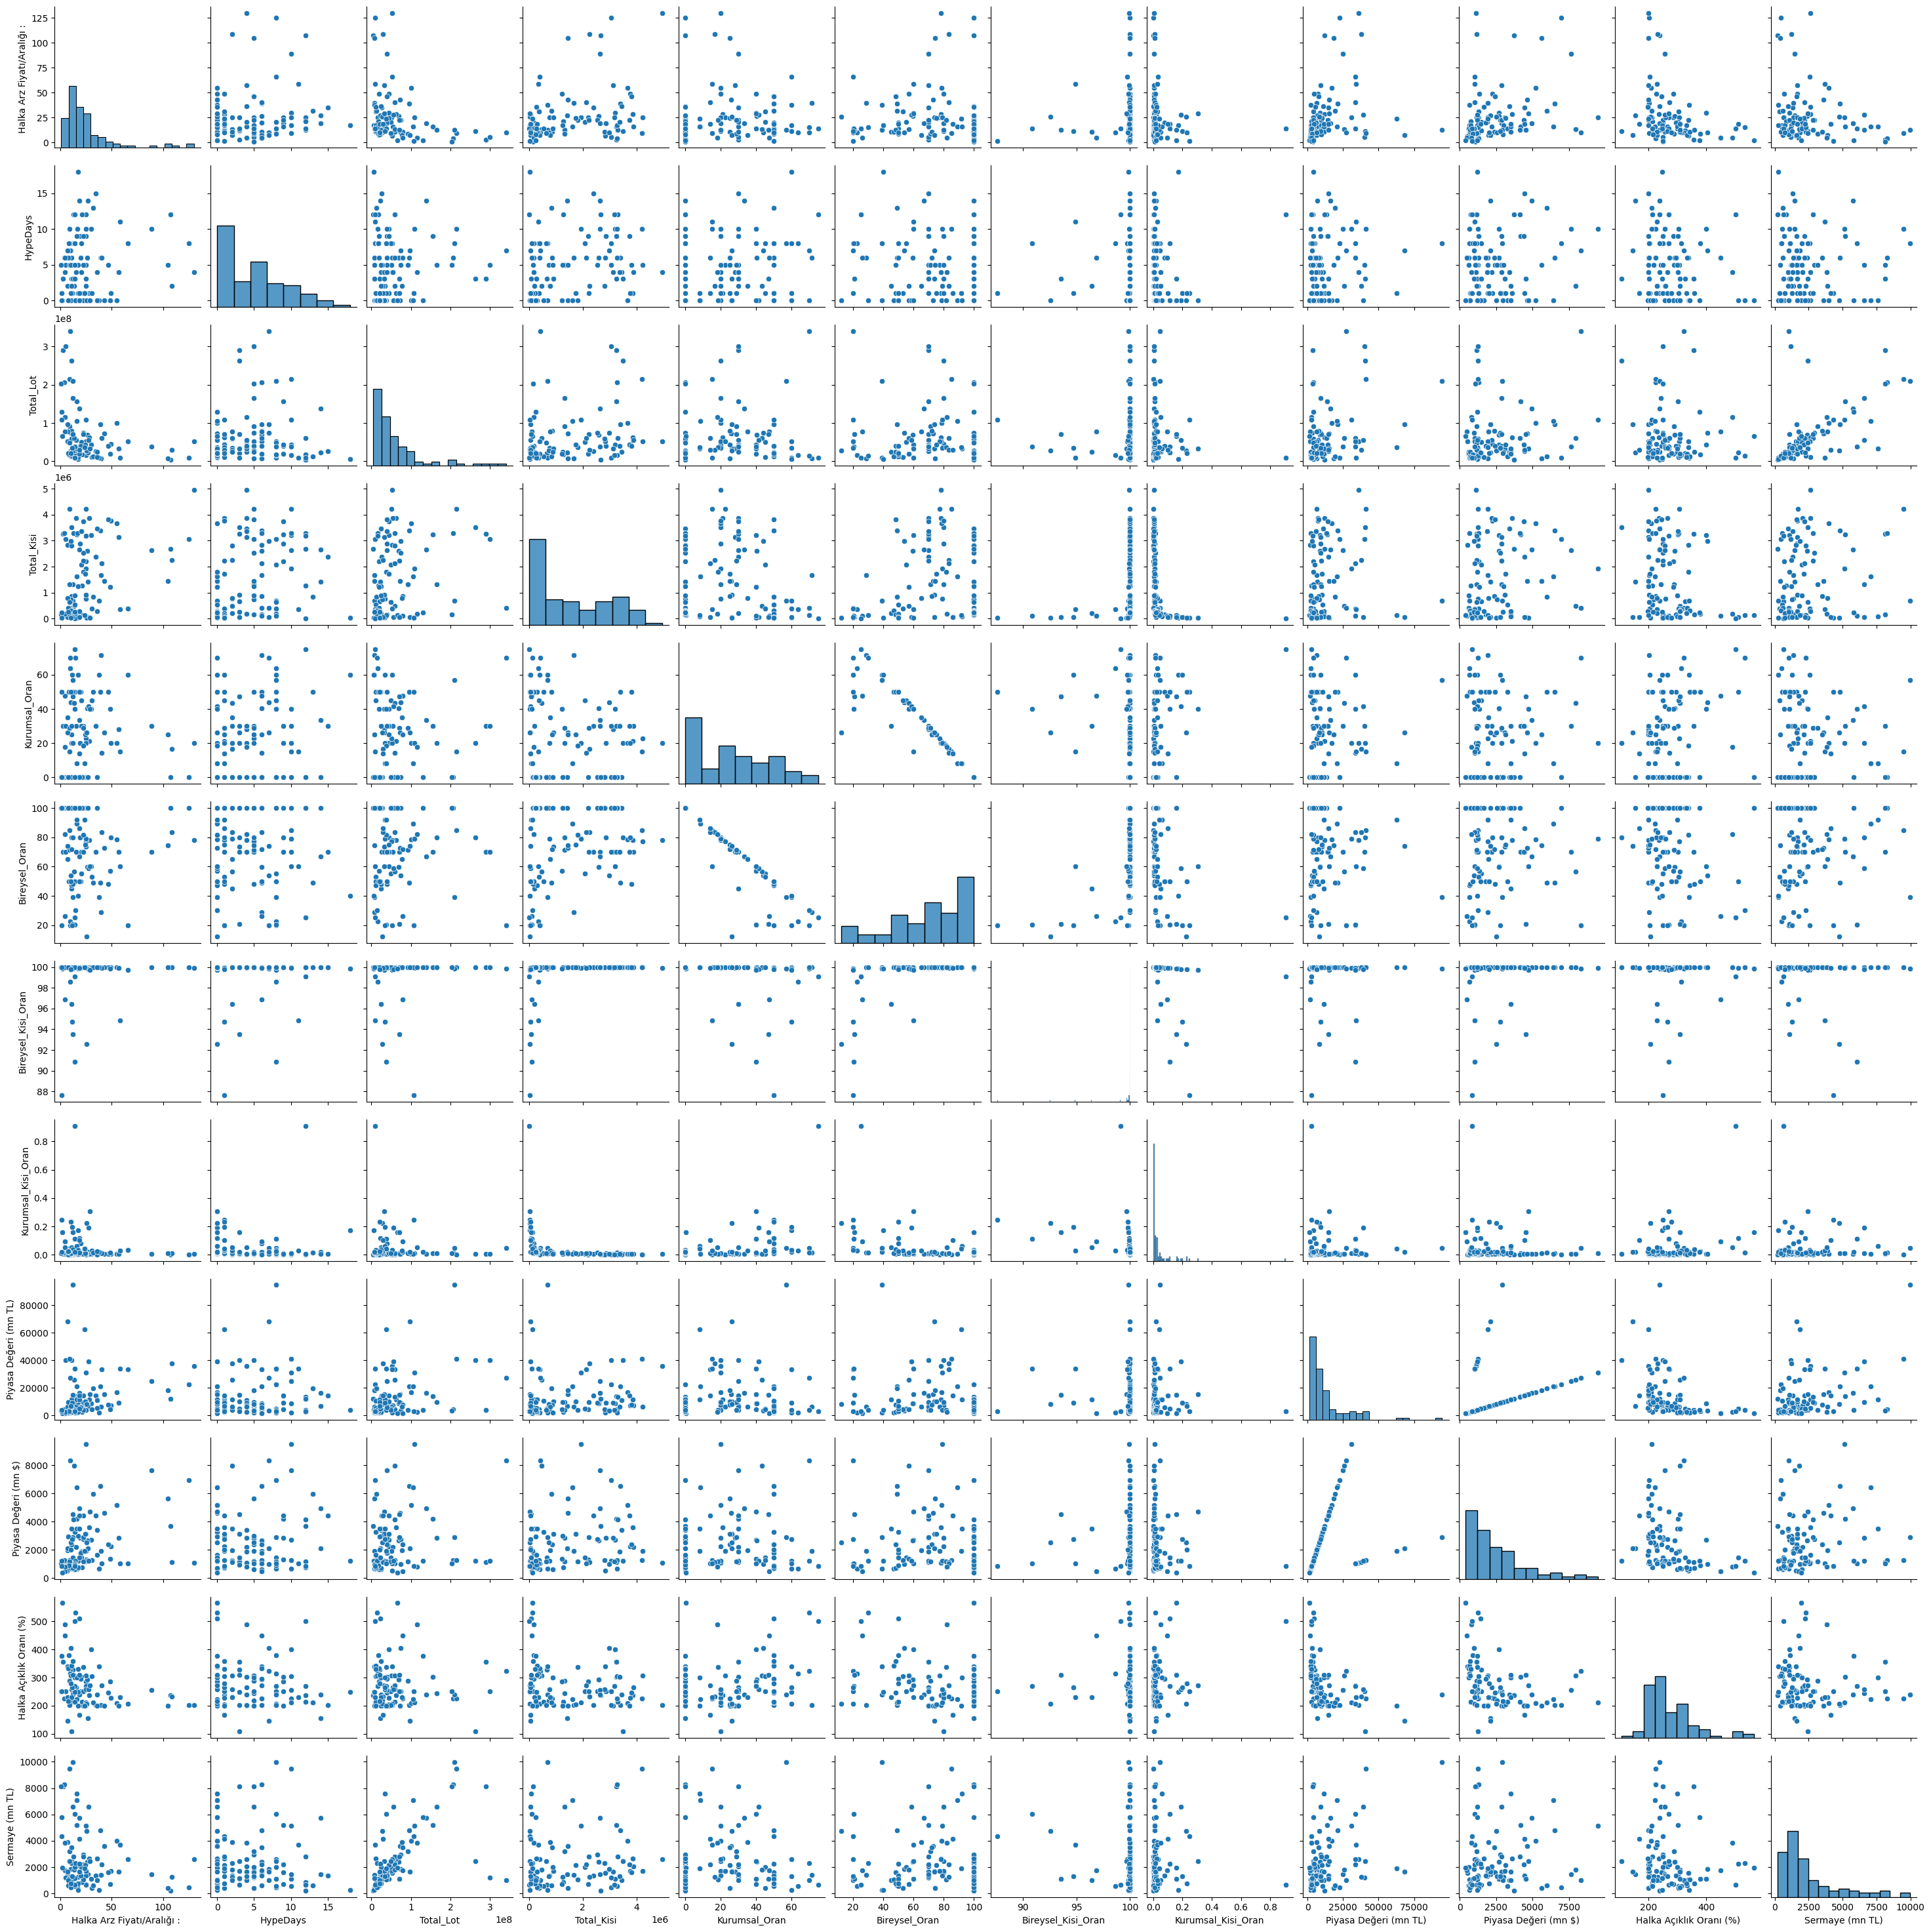

In [48]:
sns.pairplot(df_);


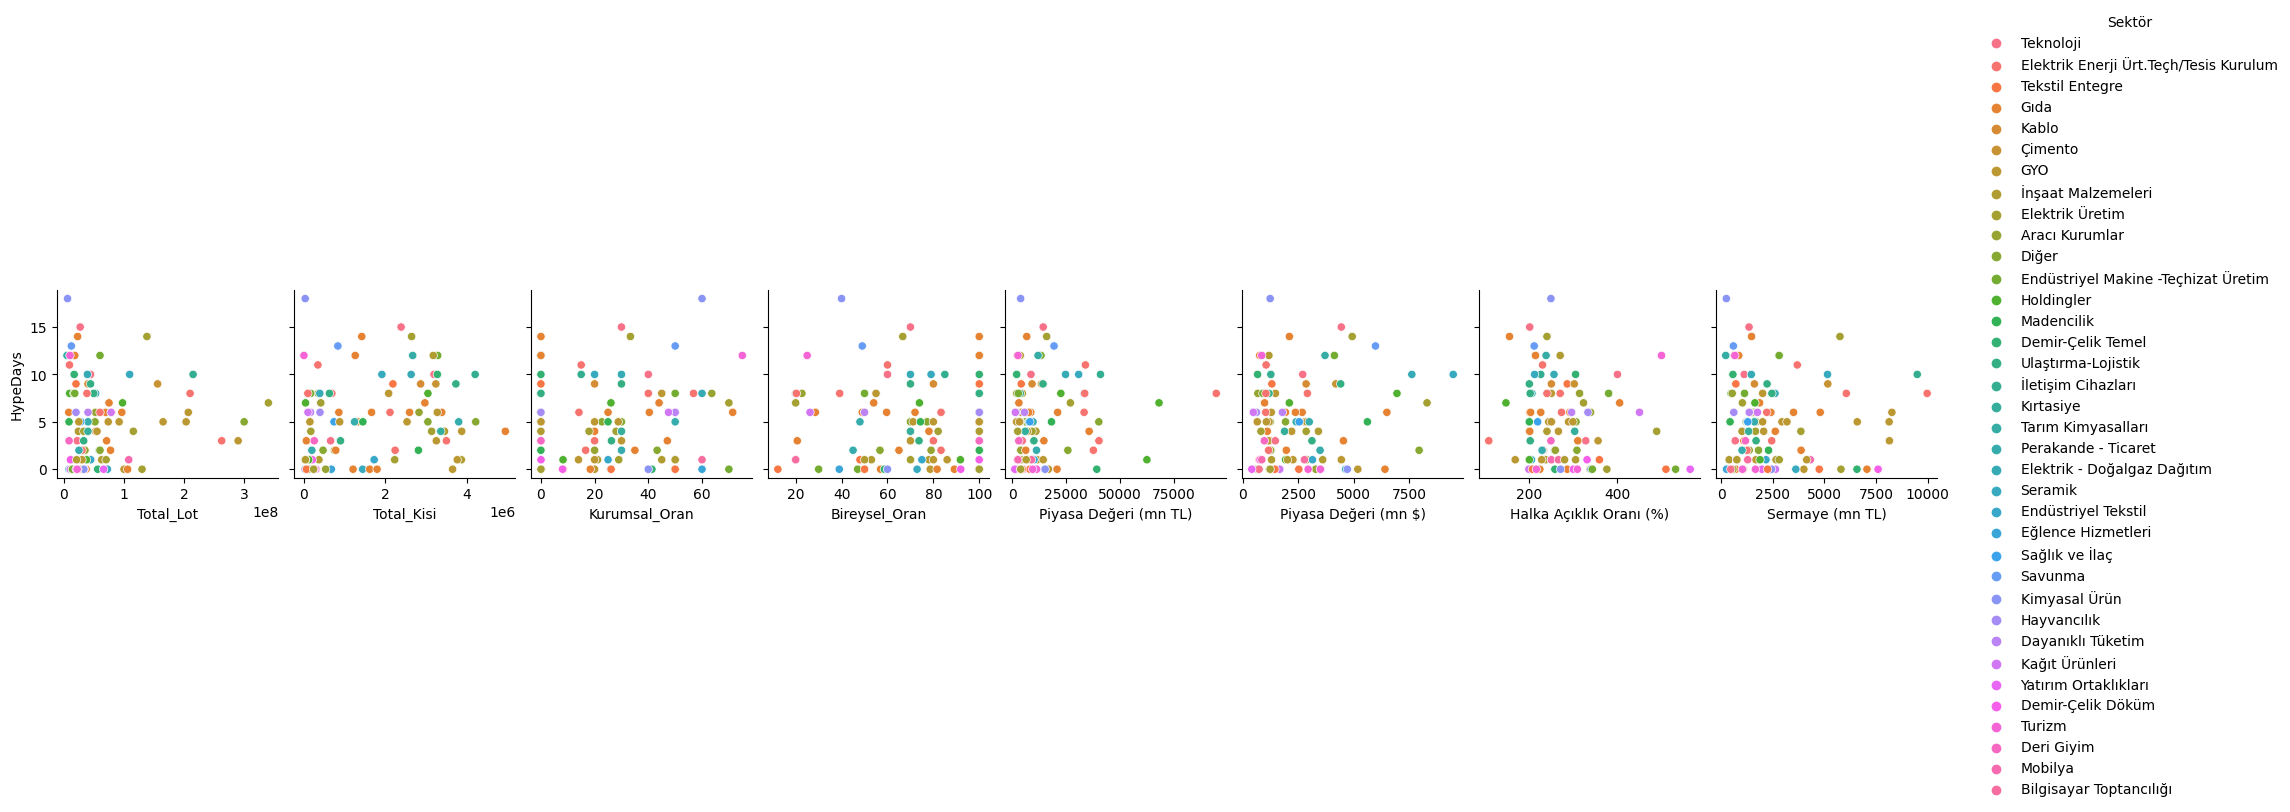

In [49]:
sns.pairplot(df, x_vars=['Total_Lot', 'Total_Kisi',
       'Kurumsal_Oran', 'Bireysel_Oran', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)'],
       y_vars=['HypeDays'], hue='Sektör')
plt.show()

In [212]:
df.corr().sort_values('HypeDays', ascending=False)['HypeDays']

ValueError: could not convert string to float: 'Eşit Dağıtım'

C:\Users\atliu\AppData\Local\Temp\ipykernel_4376\229797290.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().sort_values('HypeDays', ascending=False)[['HypeDays']], vmax=1., vmin=-1);


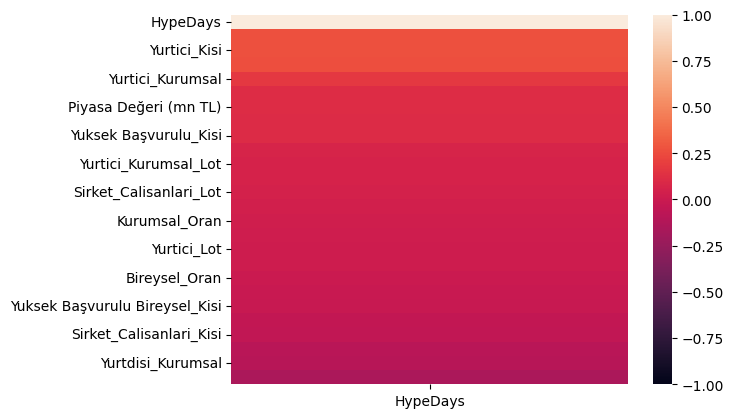

In [ ]:
sns.heatmap(df.corr().sort_values('HypeDays', ascending=False)[['HypeDays']], vmax=1., vmin=-1);
plt.show()

## Model Training

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Halka Arz Fiyatı/Aralığı :      102 non-null    float64       
 1   Dağıtım Yöntemi :               102 non-null    object        
 2   Pay :                           102 non-null    object        
 3   Symbol                          102 non-null    object        
 4   Pazar :                         102 non-null    object        
 5   Aracı Kurum :                   102 non-null    object        
 6   Bist İlk İşlem Tarihi :         102 non-null    datetime64[ns]
 7   HypeDays                        102 non-null    int64         
 8   Yurtici_Kisi                    102 non-null    float64       
 9   Yurtici_Lot                     102 non-null    float64       
 10  Yurtdisi_Kisi                   102 non-null    float64       
 11  Yurtdi

In [43]:
df_ = df.copy()
df_.columns

Index(['Halka Arz Fiyatı/Aralığı : ', 'Dağıtım Yöntemi : ', 'Pay : ', 'Symbol',
       'Pazar : ', 'Aracı Kurum : ', 'Bist İlk İşlem Tarihi : ', 'HypeDays',
       'Yurtici_Kisi', 'Yurtici_Lot', 'Yurtdisi_Kisi', 'Yurtdisi_Lot',
       'Yurtici_Kurumsal', 'Yurtici_Kurumsal_Lot', 'Yurtdisi_Kurumsal',
       'Yurtdisi_Kurumsal_Lot', 'Sirket_Calisanlari_Kisi',
       'Sirket_Calisanlari_Lot', 'Yuksek Başvurulu_Kisi',
       'Yuksek Başvurulu_Lot', 'Yuksek Başvurulu Bireysel_Kisi',
       'Yuksek Başvurulu Bireysel_Lot', 'Total_Lot', 'Total_Kisi',
       'Kurumsal_Oran', 'Bireysel_Oran', 'Bireysel_Kisi_Oran',
       'Kurumsal_Kisi_Oran', 'Sektör', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)',
       'New_Bireysel_Oran', 'New_Piyasa Değeri (mn $)', 'New_Sermaye'],
      dtype='object')

In [44]:
x = df_.drop(columns=['New_Bireysel_Oran', 'New_Piyasa Değeri (mn $)', 'New_Sermaye', 'Dağıtım Yöntemi : ', 'Pay : ', 'Symbol', 'Pazar : ', 'Aracı Kurum : ',
                      'Bist İlk İşlem Tarihi : ', 'HypeDays'])
y = df_[['HypeDays']]

In [45]:
x['Sektör'] = LabelEncoder().fit_transform(x['Sektör'])

In [46]:
# Adding constant to x
x = sm.add_constant(x)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#### OLS

##### Backward Elimination

In [48]:
def backward_elimination(x_train, y_train, sl = 0.05):
    """Backward Elimination.
    Takes train x, y data and significant level, retuns final model summary and remaining columns names.
    Significant level (sl) is 0.05 by default."""
    x_train_ = x_train.copy()
    model = sm.OLS(y_train, x_train_).fit()
    while any(model.pvalues > sl):
        x_train_.drop(columns = [model.pvalues.idxmax()], axis = 1, inplace = True)
        model = sm.OLS(y_train, x_train_).fit()
    eq = 'HypeDays = '
    for parameter in model.params.keys():
        eq = eq + str(model.params[parameter]) + '*' + parameter + ' + '
    eq = eq[:-2]
    return model, x_train_.columns, eq

In [49]:
model, cols, eq = backward_elimination(x_train, y_train)

##### Backward Elimination (Step By Step)

In [60]:
lm = sm.OLS(y_train, x_train)
model = lm.fit()

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.612
Method:                 Least Squares   F-statistic:                              6.805
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    1.98e-09
Time:                        10:46:36   Log-Likelihood:                         -215.67
No. Observations:                  81   AIC:                                      475.3
Df Residuals:                      59   BIC:                                      528.0
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0281      0.027     -1.035      0.305      -0.082       0.026
Yurtici_Kisi                      -0.0009      0.004     -0.242      0.810      -0.008       0.007
Yurtici_Lot                    -9.429e-07   2.38e-06     -0.397      0.693    -5.7e-06    3.81e-06
Yurtdisi_Kisi                      0.0001      0.004      0.032      0.975      -0.007       0.008
Yurtdisi_Lot                    6.022e-06   1.43e-05      0.421      0.676   -2.26e-05    3.47e-05
Yurtici_Kurumsal                  -0.0015      0.008     -0.177      0.860      -0.018       0.015
Yurtici_Kurumsal_Lot            -9.14e-07   2.32e-06     -0.394      0.695   -5.55e-06    3.72e-06
Yurtdisi_Kurumsal                  0.0046      0.023      0.196      0.845      -0.042       0.052
Yurtdisi_Kurumsal_Lot          -8.628e-07   2.34e-06     -0.369      0.713   -5.54e-06    3.81e-06
Sirket_Calisanlari_Kisi           -0.0010      0.004     -0.269      0.789      -0.009       0.007
Sirket_Calisanlari_Lot         -1.272e-06   2.59e-06     -0.491      0.625   -6.45e-06    3.91e-06
Yuksek Başvurulu_Kisi             -0.0004      0.004     -0.105      0.917      -0.008       0.007
Yuksek Başvurulu_Lot           -1.096e-06   2.42e-06     -0.453      0.652   -5.93e-06    3.74e-06
Yuksek Başvurulu Bireysel_Kisi  7.765e-13   5.57e-13      1.395      0.168   -3.38e-13    1.89e-12
Yuksek Başvurulu Bireysel_Lot  -9.119e-14   6.53e-14     -1.396      0.168   -2.22e-13    3.96e-14
Total_Lot                       9.287e-07   2.36e-06      0.394      0.695   -3.79e-06    5.65e-06
Total_Kisi                         0.0009      0.004      0.242      0.810      -0.007       0.008
Kurumsal_Oran                      0.1062      0.113      0.943      0.350      -0.119       0.332
Bireysel_Oran                      0.0514      0.103      0.500      0.619      -0.154       0.257
Bireysel_Kisi_Oran                -0.0127      0.109     -0.116      0.908      -0.230       0.205
Kurumsal_Kisi_Oran                 7.0952      5.086      1.395      0.168      -3.082      17.273
Sektör                             0.0053      0.053      0.099      0.921      -0.102       0.112
Piyasa Değeri (mn TL)           4.278e-05    4.6e-05      0.931      0.356   -4.92e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.583      0.562      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0098      0.009     -1.055      0.296      -0.028       0.009
Sermaye (mn TL)                  4.35e-05      0.000      0.137      0.892      -0.001       0.001
==============================================================================
Omnibus:                       11.

Check p-val, and do it again.

In [62]:
x_train.drop(columns=['Yurtdisi_Kisi'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.612
Method:                 Least Squares   F-statistic:                              6.805
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    1.98e-09
Time:                        10:46:36   Log-Likelihood:                         -215.67
No. Observations:                  81   AIC:                                      475.3
Df Residuals:                      59   BIC:                                      528.0
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0281      0.027     -1.035      0.305      -0.082       0.026
Yurtici_Kisi                      -0.0010      0.000     -2.407      0.019      -0.002      -0.000
Yurtici_Lot                    -9.387e-07   2.38e-06     -0.395      0.694   -5.69e-06    3.81e-06
Yurtdisi_Lot                    6.026e-06   1.43e-05      0.421      0.675   -2.26e-05    3.47e-05
Yurtici_Kurumsal                  -0.0016      0.008     -0.211      0.834      -0.017       0.013
Yurtici_Kurumsal_Lot           -9.098e-07   2.32e-06     -0.393      0.696   -5.55e-06    3.73e-06
Yurtdisi_Kurumsal                  0.0045      0.027      0.166      0.869      -0.050       0.059
Yurtdisi_Kurumsal_Lot          -8.586e-07   2.34e-06     -0.367      0.715   -5.53e-06    3.82e-06
Sirket_Calisanlari_Kisi           -0.0012      0.001     -1.265      0.211      -0.003       0.001
Sirket_Calisanlari_Lot         -1.268e-06   2.59e-06     -0.490      0.626   -6.45e-06    3.91e-06
Yuksek Başvurulu_Kisi             -0.0005      0.000     -1.051      0.297      -0.002       0.000
Yuksek Başvurulu_Lot           -1.091e-06   2.42e-06     -0.451      0.653   -5.93e-06    3.75e-06
Yuksek Başvurulu Bireysel_Kisi  1.022e-13   7.34e-14      1.393      0.169   -4.46e-14    2.49e-13
Yuksek Başvurulu Bireysel_Lot   1.463e-13   1.05e-13      1.394      0.169   -6.37e-14    3.56e-13
Total_Lot                       9.245e-07   2.36e-06      0.392      0.696   -3.79e-06    5.64e-06
Total_Kisi                         0.0010      0.000      2.410      0.019       0.000       0.002
Kurumsal_Oran                      0.1062      0.113      0.943      0.350      -0.119       0.332
Bireysel_Oran                      0.0514      0.103      0.500      0.619      -0.154       0.257
Bireysel_Kisi_Oran                -0.0127      0.109     -0.116      0.908      -0.230       0.205
Kurumsal_Kisi_Oran                 7.0952      5.086      1.395      0.168      -3.082      17.273
Sektör                             0.0053      0.053      0.099      0.921      -0.102       0.112
Piyasa Değeri (mn TL)           4.278e-05    4.6e-05      0.931      0.356   -4.92e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.583      0.562      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0098      0.009     -1.055      0.296      -0.028       0.009
Sermaye (mn TL)                  4.35e-05      0.000      0.137      0.892      -0.001       0.001
==============================================================================
Omnibus:                       11.594   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.003   Jarque-Bera (J

In [63]:
x_train.drop(columns=['Bireysel_Kisi_Oran'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.618
Method:                 Least Squares   F-statistic:                              7.248
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    7.20e-10
Time:                        10:46:37   Log-Likelihood:                         -215.68
No. Observations:                  81   AIC:                                      473.4
Df Residuals:                      60   BIC:                                      523.6
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0283      0.027     -1.053      0.296      -0.082       0.025
Yurtici_Kisi                      -0.0010      0.000     -2.429      0.018      -0.002      -0.000
Yurtici_Lot                        -1e-06    2.3e-06     -0.435      0.665    -5.6e-06     3.6e-06
Yurtdisi_Lot                    6.394e-06   1.38e-05      0.462      0.646   -2.13e-05    3.41e-05
Yurtici_Kurumsal                  -0.0017      0.007     -0.234      0.815      -0.016       0.013
Yurtici_Kurumsal_Lot           -9.682e-07   2.25e-06     -0.431      0.668   -5.47e-06    3.53e-06
Yurtdisi_Kurumsal                  0.0050      0.026      0.190      0.850      -0.048       0.058
Yurtdisi_Kurumsal_Lot           -9.19e-07   2.26e-06     -0.406      0.686   -5.45e-06    3.61e-06
Sirket_Calisanlari_Kisi           -0.0011      0.001     -1.271      0.209      -0.003       0.001
Sirket_Calisanlari_Lot         -1.335e-06   2.51e-06     -0.532      0.597   -6.35e-06    3.68e-06
Yuksek Başvurulu_Kisi             -0.0005      0.000     -1.077      0.286      -0.001       0.000
Yuksek Başvurulu_Lot           -1.167e-06   2.32e-06     -0.504      0.616    -5.8e-06    3.47e-06
Yuksek Başvurulu Bireysel_Kisi  7.247e-14   5.02e-14      1.444      0.154   -2.79e-14    1.73e-13
Yuksek Başvurulu Bireysel_Lot    9.31e-14   6.47e-14      1.439      0.155   -3.63e-14    2.22e-13
Total_Lot                       9.853e-07   2.28e-06      0.431      0.668   -3.59e-06    5.56e-06
Total_Kisi                         0.0010      0.000      2.432      0.018       0.000       0.002
Kurumsal_Oran                      0.0942      0.044      2.117      0.038       0.005       0.183
Bireysel_Oran                      0.0400      0.031      1.271      0.209      -0.023       0.103
Kurumsal_Kisi_Oran                 7.1816      4.990      1.439      0.155      -2.800      17.163
Sektör                             0.0045      0.052      0.085      0.933      -0.100       0.109
Piyasa Değeri (mn TL)           4.181e-05   4.48e-05      0.933      0.355   -4.79e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.580      0.564      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0100      0.009     -1.137      0.260      -0.028       0.008
Sermaye (mn TL)                 3.957e-05      0.000      0.126      0.900      -0.001       0.001
==============================================================================
Omnibus:                       11.617   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.003
Skew:                           0.833   Prob(JB):                      0.0

In [64]:
x_train.drop(columns=['Sermaye (mn TL)'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.624
Method:                 Least Squares   F-statistic:                              7.734
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    2.54e-10
Time:                        10:46:37   Log-Likelihood:                         -215.69
No. Observations:                  81   AIC:                                      471.4
Df Residuals:                      61   BIC:                                      519.3
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0290      0.026     -1.111      0.271      -0.081       0.023
Yurtici_Kisi                      -0.0010      0.000     -2.450      0.017      -0.002      -0.000
Yurtici_Lot                    -1.044e-06   2.26e-06     -0.463      0.645   -5.56e-06    3.47e-06
Yurtdisi_Lot                    6.658e-06   1.36e-05      0.490      0.626   -2.05e-05    3.38e-05
Yurtici_Kurumsal                  -0.0016      0.007     -0.220      0.827      -0.016       0.013
Yurtici_Kurumsal_Lot           -1.013e-06    2.2e-06     -0.460      0.647   -5.42e-06    3.39e-06
Yurtdisi_Kurumsal                  0.0048      0.026      0.183      0.855      -0.048       0.057
Yurtdisi_Kurumsal_Lot          -9.636e-07   2.22e-06     -0.434      0.666    -5.4e-06    3.48e-06
Sirket_Calisanlari_Kisi           -0.0011      0.001     -1.278      0.206      -0.003       0.001
Sirket_Calisanlari_Lot         -1.387e-06   2.46e-06     -0.565      0.574    -6.3e-06    3.52e-06
Yuksek Başvurulu_Kisi             -0.0005      0.000     -1.078      0.285      -0.001       0.000
Yuksek Başvurulu_Lot           -1.207e-06   2.28e-06     -0.531      0.598   -5.76e-06    3.34e-06
Yuksek Başvurulu Bireysel_Kisi -3.259e-15   2.27e-15     -1.439      0.155   -7.79e-15    1.27e-15
Yuksek Başvurulu Bireysel_Lot   9.808e-14   6.78e-14      1.448      0.153   -3.74e-14    2.34e-13
Total_Lot                        1.03e-06   2.24e-06      0.460      0.647   -3.45e-06    5.51e-06
Total_Kisi                         0.0010      0.000      2.454      0.017       0.000       0.002
Kurumsal_Oran                      0.0936      0.044      2.131      0.037       0.006       0.181
Bireysel_Oran                      0.0397      0.031      1.275      0.207      -0.023       0.102
Kurumsal_Kisi_Oran                 7.1583      4.946      1.447      0.153      -2.733      17.049
Sektör                             0.0042      0.052      0.081      0.935      -0.100       0.108
Piyasa Değeri (mn TL)            4.32e-05   4.31e-05      1.003      0.320    -4.3e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.663      0.510      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0098      0.009     -1.142      0.258      -0.027       0.007
==============================================================================
Omnibus:                       11.582   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.953
Skew:                           0.832   Prob(JB):                      0.00254
Kurtosis:                       3.879   Cond. No.                     3.25e+23
===============

In [65]:
x_train.drop(columns=['Sektör'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.630
Method:                 Least Squares   F-statistic:                              8.273
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    8.63e-11
Time:                        10:46:37   Log-Likelihood:                         -215.70
No. Observations:                  81   AIC:                                      469.4
Df Residuals:                      62   BIC:                                      514.9
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0294      0.025     -1.155      0.253      -0.080       0.021
Yurtici_Kisi                      -0.0010      0.000     -2.469      0.016      -0.002      -0.000
Yurtici_Lot                    -1.018e-06   2.23e-06     -0.458      0.649   -5.47e-06    3.43e-06
Yurtdisi_Lot                    6.539e-06   1.34e-05      0.489      0.627   -2.02e-05    3.33e-05
Yurtici_Kurumsal                  -0.0016      0.007     -0.222      0.825      -0.016       0.013
Yurtici_Kurumsal_Lot           -9.881e-07   2.17e-06     -0.455      0.651   -5.33e-06    3.36e-06
Yurtdisi_Kurumsal                  0.0051      0.026      0.198      0.844      -0.046       0.057
Yurtdisi_Kurumsal_Lot          -9.384e-07   2.19e-06     -0.429      0.670   -5.31e-06    3.44e-06
Sirket_Calisanlari_Kisi           -0.0011      0.001     -1.286      0.203      -0.003       0.001
Sirket_Calisanlari_Lot         -1.358e-06   2.42e-06     -0.562      0.576   -6.19e-06    3.48e-06
Yuksek Başvurulu_Kisi             -0.0005      0.000     -1.086      0.282      -0.001       0.000
Yuksek Başvurulu_Lot           -1.179e-06   2.24e-06     -0.526      0.601   -5.66e-06     3.3e-06
Yuksek Başvurulu Bireysel_Kisi  2.966e-13   1.95e-13      1.521      0.133   -9.32e-14    6.86e-13
Yuksek Başvurulu Bireysel_Lot  -1.335e-14   8.76e-15     -1.523      0.133   -3.09e-14    4.17e-15
Total_Lot                       1.004e-06   2.21e-06      0.455      0.651   -3.41e-06    5.42e-06
Total_Kisi                         0.0010      0.000      2.473      0.016       0.000       0.002
Kurumsal_Oran                      0.0944      0.043      2.210      0.031       0.009       0.180
Bireysel_Oran                      0.0405      0.029      1.390      0.169      -0.018       0.099
Kurumsal_Kisi_Oran                 7.2533      4.768      1.521      0.133      -2.278      16.785
Piyasa Değeri (mn TL)           4.314e-05   4.27e-05      1.010      0.317   -4.23e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.703      0.485      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0099      0.009     -1.160      0.251      -0.027       0.007
==============================================================================
Omnibus:                       11.609   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.988
Skew:                           0.834   Prob(JB):                      0.00249
Kurtosis:                       3.879   Cond. No.                     3.25e+22
==============================================================================

Notes:
[1] R² is computed without 

In [66]:
x_train.drop(columns=['Yurtici_Kurumsal'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.636
Method:                 Least Squares   F-statistic:                              8.864
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    2.89e-11
Time:                        10:46:37   Log-Likelihood:                         -215.73
No. Observations:                  81   AIC:                                      467.5
Df Residuals:                      63   BIC:                                      510.6
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0296      0.025     -1.173      0.245      -0.080       0.021
Yurtici_Kisi                      -0.0010      0.000     -2.541      0.014      -0.002      -0.000
Yurtici_Lot                    -8.449e-07   2.05e-06     -0.412      0.682   -4.94e-06    3.25e-06
Yurtdisi_Lot                    5.436e-06   1.24e-05      0.440      0.661   -1.92e-05    3.01e-05
Yurtici_Kurumsal_Lot           -8.189e-07      2e-06     -0.409      0.684   -4.82e-06    3.18e-06
Yurtdisi_Kurumsal                  0.0040      0.025      0.159      0.874      -0.046       0.054
Yurtdisi_Kurumsal_Lot          -7.642e-07   2.01e-06     -0.380      0.705   -4.78e-06    3.25e-06
Sirket_Calisanlari_Kisi           -0.0012      0.001     -1.371      0.175      -0.003       0.001
Sirket_Calisanlari_Lot         -1.193e-06   2.27e-06     -0.526      0.601   -5.73e-06    3.34e-06
Yuksek Başvurulu_Kisi             -0.0005      0.000     -1.161      0.250      -0.001       0.000
Yuksek Başvurulu_Lot           -1.004e-06   2.06e-06     -0.486      0.628   -5.13e-06    3.12e-06
Yuksek Başvurulu Bireysel_Kisi -1.068e-12   6.99e-13     -1.527      0.132   -2.47e-12     3.3e-13
Yuksek Başvurulu Bireysel_Lot   1.263e-13   8.28e-14      1.526      0.132   -3.91e-14    2.92e-13
Total_Lot                       8.318e-07   2.03e-06      0.409      0.684   -3.23e-06     4.9e-06
Total_Kisi                         0.0010      0.000      2.545      0.013       0.000       0.002
Kurumsal_Oran                      0.0906      0.039      2.328      0.023       0.013       0.168
Bireysel_Oran                      0.0385      0.027      1.402      0.166      -0.016       0.093
Kurumsal_Kisi_Oran                 7.2212      4.730      1.527      0.132      -2.231      16.673
Piyasa Değeri (mn TL)           4.386e-05   4.23e-05      1.037      0.304   -4.07e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.702      0.485      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0093      0.008     -1.157      0.252      -0.025       0.007
==============================================================================
Omnibus:                       11.597   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.998
Skew:                           0.828   Prob(JB):                      0.00248
Kurtosis:                       3.902   Cond. No.                     7.96e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that

In [67]:
x_train.drop(columns=['Yurtdisi_Kurumsal'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.642
Method:                 Least Squares   F-statistic:                              9.529
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    9.21e-12
Time:                        10:46:38   Log-Likelihood:                         -215.75
No. Observations:                  81   AIC:                                      465.5
Df Residuals:                      64   BIC:                                      506.2
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0294      0.025     -1.176      0.244      -0.079       0.021
Yurtici_Kisi                      -0.0010      0.000     -2.568      0.013      -0.002      -0.000
Yurtici_Lot                    -7.595e-07   1.97e-06     -0.385      0.701    -4.7e-06    3.18e-06
Yurtdisi_Lot                    4.957e-06   1.19e-05      0.417      0.678   -1.88e-05    2.87e-05
Yurtici_Kurumsal_Lot           -7.361e-07   1.93e-06     -0.382      0.704   -4.58e-06    3.11e-06
Yurtdisi_Kurumsal_Lot          -6.803e-07   1.93e-06     -0.352      0.726   -4.54e-06    3.18e-06
Sirket_Calisanlari_Kisi           -0.0012      0.001     -1.388      0.170      -0.003       0.001
Sirket_Calisanlari_Lot         -1.105e-06   2.19e-06     -0.504      0.616   -5.48e-06    3.27e-06
Yuksek Başvurulu_Kisi             -0.0005      0.000     -1.187      0.240      -0.001       0.000
Yuksek Başvurulu_Lot           -9.186e-07   1.98e-06     -0.463      0.645   -4.88e-06    3.05e-06
Yuksek Başvurulu Bireysel_Kisi -5.395e-13   3.51e-13     -1.537      0.129   -1.24e-12    1.62e-13
Yuksek Başvurulu Bireysel_Lot   4.829e-13   3.14e-13      1.536      0.130   -1.45e-13    1.11e-12
Total_Lot                       7.472e-07   1.95e-06      0.382      0.704   -3.16e-06    4.65e-06
Total_Kisi                         0.0010      0.000      2.571      0.012       0.000       0.002
Kurumsal_Oran                      0.0887      0.037      2.417      0.019       0.015       0.162
Bireysel_Oran                      0.0371      0.026      1.437      0.156      -0.014       0.089
Kurumsal_Kisi_Oran                 7.2085      4.693      1.536      0.129      -2.167      16.584
Piyasa Değeri (mn TL)           4.445e-05   4.18e-05      1.063      0.292   -3.91e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.723      0.473      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0087      0.007     -1.228      0.224      -0.023       0.005
==============================================================================
Omnibus:                       11.869   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.398
Skew:                           0.834   Prob(JB):                      0.00203
Kurtosis:                       3.943   Cond. No.                     3.21e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.12e-2

In [68]:
x_train.drop(columns=['Yurtdisi_Kurumsal_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.642
Method:                 Least Squares   F-statistic:                              9.529
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    9.21e-12
Time:                        10:46:38   Log-Likelihood:                         -215.75
No. Observations:                  81   AIC:                                      465.5
Df Residuals:                      64   BIC:                                      506.2
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0294      0.025     -1.176      0.244      -0.079       0.021
Yurtici_Kisi                      -0.0010      0.000     -2.568      0.013      -0.002      -0.000
Yurtici_Lot                    -7.916e-08   1.27e-07     -0.621      0.537   -3.34e-07    1.75e-07
Yurtdisi_Lot                    5.637e-06   1.38e-05      0.408      0.684   -2.19e-05    3.32e-05
Yurtici_Kurumsal_Lot           -5.572e-08   1.25e-07     -0.447      0.656   -3.05e-07    1.93e-07
Sirket_Calisanlari_Kisi           -0.0012      0.001     -1.388      0.170      -0.003       0.001
Sirket_Calisanlari_Lot         -4.242e-07   7.32e-07     -0.580      0.564   -1.89e-06    1.04e-06
Yuksek Başvurulu_Kisi             -0.0005      0.000     -1.187      0.240      -0.001       0.000
Yuksek Başvurulu_Lot           -2.382e-07   1.75e-07     -1.360      0.179   -5.88e-07    1.12e-07
Yuksek Başvurulu Bireysel_Kisi -2.123e-13   1.38e-13     -1.534      0.130   -4.89e-13    6.42e-14
Yuksek Başvurulu Bireysel_Lot   3.601e-13   2.34e-13      1.536      0.130   -1.08e-13    8.29e-13
Total_Lot                       6.688e-08   1.19e-07      0.563      0.576   -1.71e-07    3.04e-07
Total_Kisi                         0.0010      0.000      2.571      0.012       0.000       0.002
Kurumsal_Oran                      0.0887      0.037      2.417      0.019       0.015       0.162
Bireysel_Oran                      0.0371      0.026      1.437      0.156      -0.014       0.089
Kurumsal_Kisi_Oran                 7.2085      4.693      1.536      0.129      -2.167      16.584
Piyasa Değeri (mn TL)           4.445e-05   4.18e-05      1.063      0.292   -3.91e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.723      0.473      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0087      0.007     -1.228      0.224      -0.023       0.005
==============================================================================
Omnibus:                       11.869   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.398
Skew:                           0.834   Prob(JB):                      0.00203
Kurtosis:                       3.943   Cond. No.                     5.69e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.55e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix i

In [69]:
x_train.drop(columns=['Yurtdisi_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.716
Model:                            OLS   Adj. R-squared (uncentered):              0.646
Method:                 Least Squares   F-statistic:                              10.25
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    3.02e-12
Time:                        10:46:38   Log-Likelihood:                         -215.85
No. Observations:                  81   AIC:                                      463.7
Df Residuals:                      65   BIC:                                      502.0
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0290      0.025     -1.167      0.247      -0.079       0.021
Yurtici_Kisi                      -0.0011      0.000     -3.298      0.002      -0.002      -0.000
Yurtici_Lot                     -6.06e-08   1.18e-07     -0.512      0.610   -2.97e-07    1.76e-07
Yurtici_Kurumsal_Lot           -5.616e-08   1.24e-07     -0.453      0.652   -3.04e-07    1.91e-07
Sirket_Calisanlari_Kisi           -0.0012      0.001     -1.534      0.130      -0.003       0.000
Sirket_Calisanlari_Lot         -3.437e-07      7e-07     -0.491      0.625   -1.74e-06    1.06e-06
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.598      0.115      -0.001       0.000
Yuksek Başvurulu_Lot           -2.152e-07   1.65e-07     -1.306      0.196   -5.44e-07    1.14e-07
Yuksek Başvurulu Bireysel_Kisi -1.384e-13   9.19e-14     -1.505      0.137   -3.22e-13    4.52e-14
Yuksek Başvurulu Bireysel_Lot  -1.408e-13   9.34e-14     -1.508      0.136   -3.27e-13    4.57e-14
Total_Lot                       5.501e-08   1.14e-07      0.480      0.633   -1.74e-07    2.84e-07
Total_Kisi                         0.0011      0.000      3.302      0.002       0.000       0.002
Kurumsal_Oran                      0.0915      0.036      2.559      0.013       0.020       0.163
Bireysel_Oran                      0.0364      0.026      1.422      0.160      -0.015       0.087
Kurumsal_Kisi_Oran                 6.9491      4.620      1.504      0.137      -2.278      16.176
Piyasa Değeri (mn TL)           4.251e-05   4.13e-05      1.030      0.307   -3.99e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.722      0.473      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0086      0.007     -1.223      0.226      -0.023       0.005
==============================================================================
Omnibus:                       11.723   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.167
Skew:                           0.834   Prob(JB):                      0.00228
Kurtosis:                       3.909   Cond. No.                     8.38e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.64e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
x_train.drop(columns=['Yurtici_Kurumsal_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.650
Method:                 Least Squares   F-statistic:                              11.05
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    9.72e-13
Time:                        10:46:38   Log-Likelihood:                         -215.98
No. Observations:                  81   AIC:                                      462.0
Df Residuals:                      66   BIC:                                      497.9
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0265      0.024     -1.101      0.275      -0.075       0.022
Yurtici_Kisi                      -0.0011      0.000     -3.312      0.002      -0.002      -0.000
Yurtici_Lot                    -1.249e-08   5.19e-08     -0.241      0.811   -1.16e-07    9.11e-08
Sirket_Calisanlari_Kisi           -0.0013      0.001     -1.699      0.094      -0.003       0.000
Sirket_Calisanlari_Lot          -6.41e-08    3.3e-07     -0.194      0.847   -7.23e-07    5.95e-07
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.572      0.121      -0.001       0.000
Yuksek Başvurulu_Lot           -1.762e-07    1.4e-07     -1.262      0.212   -4.55e-07    1.03e-07
Yuksek Başvurulu Bireysel_Kisi  4.518e-13   2.95e-13      1.534      0.130   -1.36e-13    1.04e-12
Yuksek Başvurulu Bireysel_Lot  -2.023e-13   1.32e-13     -1.533      0.130   -4.66e-13    6.11e-14
Total_Lot                       6.931e-09   4.29e-08      0.161      0.872   -7.88e-08    9.27e-08
Total_Kisi                         0.0011      0.000      3.315      0.001       0.000       0.002
Kurumsal_Oran                      0.0922      0.036      2.594      0.012       0.021       0.163
Bireysel_Oran                      0.0372      0.025      1.469      0.147      -0.013       0.088
Kurumsal_Kisi_Oran                 7.0371      4.588      1.534      0.130      -2.123      16.197
Piyasa Değeri (mn TL)           3.327e-05   3.57e-05      0.933      0.354   -3.79e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.666      0.508      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0088      0.007     -1.255      0.214      -0.023       0.005
==============================================================================
Omnibus:                       11.331   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.631
Skew:                           0.818   Prob(JB):                      0.00298
Kurtosis:                       3.878   Cond. No.                     3.56e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 8.83e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
x_train.drop(columns=['Total_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.656
Method:                 Least Squares   F-statistic:                              12.01
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    2.76e-13
Time:                        10:46:38   Log-Likelihood:                         -216.00
No. Observations:                  81   AIC:                                      460.0
Df Residuals:                      67   BIC:                                      493.5
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0271      0.024     -1.149      0.255      -0.074       0.020
Yurtici_Kisi                      -0.0011      0.000     -3.384      0.001      -0.002      -0.000
Yurtici_Lot                    -4.309e-09   1.11e-08     -0.387      0.700   -2.65e-08    1.79e-08
Sirket_Calisanlari_Kisi           -0.0013      0.001     -1.735      0.087      -0.003       0.000
Sirket_Calisanlari_Lot         -1.596e-08    1.4e-07     -0.114      0.910   -2.96e-07    2.64e-07
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.575      0.120      -0.001       0.000
Yuksek Başvurulu_Lot           -1.625e-07    1.1e-07     -1.477      0.144   -3.82e-07    5.71e-08
Yuksek Başvurulu Bireysel_Kisi -1.005e-12   6.54e-13     -1.537      0.129   -2.31e-12       3e-13
Yuksek Başvurulu Bireysel_Lot   -7.18e-13   4.67e-13     -1.537      0.129   -1.65e-12    2.14e-13
Total_Kisi                         0.0011      0.000      3.388      0.001       0.000       0.002
Kurumsal_Oran                      0.0936      0.034      2.737      0.008       0.025       0.162
Bireysel_Oran                      0.0363      0.025      1.481      0.143      -0.013       0.085
Kurumsal_Kisi_Oran                 6.9415      4.516      1.537      0.129      -2.073      15.956
Piyasa Değeri (mn TL)           3.538e-05   3.29e-05      1.074      0.287   -3.04e-05       0.000
Piyasa Değeri (mn $)               0.0002      0.000      0.683      0.497      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0087      0.007     -1.255      0.214      -0.022       0.005
==============================================================================
Omnibus:                       11.114   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.349
Skew:                           0.807   Prob(JB):                      0.00343
Kurtosis:                       3.871   Cond. No.                     9.40e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.34e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
x_train.drop(columns=['Sirket_Calisanlari_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              13.12
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    7.43e-14
Time:                        10:46:39   Log-Likelihood:                         -216.00
No. Observations:                  81   AIC:                                      458.0
Df Residuals:                      68   BIC:                                      489.1
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0266      0.023     -1.159      0.251      -0.072       0.019
Yurtici_Kisi                      -0.0011      0.000     -3.462      0.001      -0.002      -0.000
Yurtici_Lot                    -4.394e-09    1.1e-08     -0.399      0.691   -2.64e-08    1.76e-08
Sirket_Calisanlari_Kisi           -0.0014      0.001     -1.784      0.079      -0.003       0.000
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.597      0.115      -0.001       0.000
Yuksek Başvurulu_Lot           -1.612e-07   1.09e-07     -1.484      0.143   -3.78e-07    5.56e-08
Yuksek Başvurulu Bireysel_Kisi -1.181e-12   7.38e-13     -1.599      0.114   -2.65e-12    2.92e-13
Yuksek Başvurulu Bireysel_Lot    3.14e-13   1.96e-13      1.600      0.114   -7.77e-14    7.06e-13
Total_Kisi                         0.0011      0.000      3.466      0.001       0.000       0.002
Kurumsal_Oran                      0.0936      0.034      2.757      0.007       0.026       0.161
Bireysel_Oran                      0.0372      0.023      1.604      0.113      -0.009       0.083
Kurumsal_Kisi_Oran                 7.0392      4.402      1.599      0.114      -1.745      15.823
Piyasa Değeri (mn TL)           3.464e-05    3.2e-05      1.081      0.284   -2.93e-05    9.86e-05
Piyasa Değeri (mn $)               0.0002      0.000      0.716      0.477      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0088      0.007     -1.323      0.190      -0.022       0.004
==============================================================================
Omnibus:                       11.276   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.560
Skew:                           0.815   Prob(JB):                      0.00309
Kurtosis:                       3.877   Cond. No.                     9.37e+22
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.36e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
x_train.drop(columns=['Yurtici_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.665
Method:                 Least Squares   F-statistic:                              14.38
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    2.05e-14
Time:                        10:46:39   Log-Likelihood:                         -216.10
No. Observations:                  81   AIC:                                      456.2
Df Residuals:                      69   BIC:                                      484.9
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0222      0.020     -1.109      0.271      -0.062       0.018
Yurtici_Kisi                      -0.0011      0.000     -3.556      0.001      -0.002      -0.000
Sirket_Calisanlari_Kisi           -0.0014      0.001     -1.827      0.072      -0.003       0.000
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.638      0.106      -0.001       0.000
Yuksek Başvurulu_Lot           -1.631e-07   1.08e-07     -1.512      0.135   -3.78e-07    5.21e-08
Yuksek Başvurulu Bireysel_Kisi  1.287e-12   8.01e-13      1.607      0.113   -3.11e-13    2.88e-12
Yuksek Başvurulu Bireysel_Lot  -5.734e-13   3.57e-13     -1.607      0.113   -1.29e-12    1.39e-13
Total_Kisi                         0.0011      0.000      3.560      0.001       0.000       0.002
Kurumsal_Oran                      0.0938      0.034      2.780      0.007       0.026       0.161
Bireysel_Oran                      0.0355      0.023      1.567      0.122      -0.010       0.081
Kurumsal_Kisi_Oran                 7.0304      4.375      1.607      0.113      -1.697      15.758
Piyasa Değeri (mn TL)           2.978e-05   2.95e-05      1.011      0.316    -2.9e-05    8.85e-05
Piyasa Değeri (mn $)               0.0002      0.000      0.717      0.476      -0.000       0.001
Halka Açıklık Oranı (%)           -0.0089      0.007     -1.341      0.184      -0.022       0.004
==============================================================================
Omnibus:                       11.289   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.618
Skew:                           0.808   Prob(JB):                      0.00300
Kurtosis:                       3.913   Cond. No.                     1.82e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.23e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
x_train.drop(columns=['Piyasa Değeri (mn $)'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.712
Model:                            OLS   Adj. R-squared (uncentered):              0.667
Method:                 Least Squares   F-statistic:                              15.75
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    6.35e-15
Time:                        10:46:39   Log-Likelihood:                         -216.40
No. Observations:                  81   AIC:                                      454.8
Df Residuals:                      70   BIC:                                      481.1
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Halka Arz Fiyatı/Aralığı :        -0.0188      0.019     -0.972      0.334      -0.058       0.020
Yurtici_Kisi                      -0.0011      0.000     -3.560      0.001      -0.002      -0.000
Sirket_Calisanlari_Kisi           -0.0014      0.001     -1.921      0.059      -0.003    5.52e-05
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.661      0.101      -0.001       0.000
Yuksek Başvurulu_Lot           -1.629e-07   1.07e-07     -1.515      0.134   -3.77e-07    5.15e-08
Yuksek Başvurulu Bireysel_Kisi  7.149e-13   4.34e-13      1.646      0.104   -1.51e-13    1.58e-12
Yuksek Başvurulu Bireysel_Lot  -5.377e-14   3.27e-14     -1.643      0.105   -1.19e-13    1.15e-14
Total_Kisi                         0.0011      0.000      3.563      0.001       0.000       0.002
Kurumsal_Oran                      0.1017      0.032      3.202      0.002       0.038       0.165
Bireysel_Oran                      0.0411      0.021      1.938      0.057      -0.001       0.083
Kurumsal_Kisi_Oran                 7.1699      4.355      1.646      0.104      -1.517      15.856
Piyasa Değeri (mn TL)           3.198e-05   2.92e-05      1.096      0.277   -2.62e-05    9.02e-05
Halka Açıklık Oranı (%)           -0.0101      0.006     -1.569      0.121      -0.023       0.003
==============================================================================
Omnibus:                       11.170   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.380
Skew:                           0.820   Prob(JB):                      0.00338
Kurtosis:                       3.825   Cond. No.                     1.30e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.03e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [75]:
x_train.drop(columns=['Halka Arz Fiyatı/Aralığı : '], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.667
Method:                 Least Squares   F-statistic:                              17.24
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    2.31e-15
Time:                        10:46:39   Log-Likelihood:                         -216.94
No. Observations:                  81   AIC:                                      453.9
Df Residuals:                      71   BIC:                                      477.8
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Yurtici_Kisi                      -0.0011      0.000     -3.500      0.001      -0.002      -0.000
Sirket_Calisanlari_Kisi           -0.0017      0.001     -2.454      0.017      -0.003      -0.000
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.691      0.095      -0.001       0.000
Yuksek Başvurulu_Lot           -1.611e-07   1.07e-07     -1.500      0.138   -3.75e-07    5.31e-08
Yuksek Başvurulu Bireysel_Kisi  1.674e-14   1.03e-14      1.630      0.107   -3.73e-15    3.72e-14
Yuksek Başvurulu Bireysel_Lot  -1.746e-13   1.07e-13     -1.631      0.107   -3.88e-13    3.88e-14
Total_Kisi                         0.0011      0.000      3.504      0.001       0.000       0.002
Kurumsal_Oran                      0.0935      0.031      3.055      0.003       0.032       0.154
Bireysel_Oran                      0.0349      0.020      1.727      0.088      -0.005       0.075
Kurumsal_Kisi_Oran                 7.0995      4.353      1.631      0.107      -1.580      15.779
Piyasa Değeri (mn TL)           3.062e-05   2.91e-05      1.051      0.297   -2.75e-05    8.87e-05
Halka Açıklık Oranı (%)           -0.0088      0.006     -1.401      0.166      -0.021       0.004
==============================================================================
Omnibus:                       10.998   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.136
Skew:                           0.819   Prob(JB):                      0.00382
Kurtosis:                       3.784   Cond. No.                     8.64e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.31e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [76]:
x_train.drop(columns=['Piyasa Değeri (mn TL)'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.667
Method:                 Least Squares   F-statistic:                              19.01
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    8.60e-16
Time:                        10:46:39   Log-Likelihood:                         -217.57
No. Observations:                  81   AIC:                                      453.1
Df Residuals:                      72   BIC:                                      474.7
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Yurtici_Kisi                      -0.0011      0.000     -3.431      0.001      -0.002      -0.000
Sirket_Calisanlari_Kisi           -0.0015      0.001     -2.271      0.026      -0.003      -0.000
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.527      0.131      -0.001       0.000
Yuksek Başvurulu_Lot           -1.606e-07   1.08e-07     -1.494      0.140   -3.75e-07    5.37e-08
Yuksek Başvurulu Bireysel_Kisi -9.774e-15   5.91e-15     -1.653      0.103   -2.16e-14    2.01e-15
Yuksek Başvurulu Bireysel_Lot   3.474e-14   2.11e-14      1.650      0.103   -7.23e-15    7.67e-14
Total_Kisi                         0.0011      0.000      3.434      0.001       0.000       0.002
Kurumsal_Oran                      0.1071      0.028      3.864      0.000       0.052       0.162
Bireysel_Oran                      0.0450      0.018      2.525      0.014       0.009       0.080
Kurumsal_Kisi_Oran                 7.1831      4.356      1.649      0.103      -1.499      15.866
Halka Açıklık Oranı (%)           -0.0113      0.006     -1.953      0.055      -0.023       0.000
==============================================================================
Omnibus:                        7.848   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.366
Skew:                           0.706   Prob(JB):                       0.0251
Kurtosis:                       3.432   Cond. No.                     4.75e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 7.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
x_train.drop(columns=['Yuksek Başvurulu_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.695
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              20.75
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    5.20e-16
Time:                        10:46:40   Log-Likelihood:                         -218.80
No. Observations:                  81   AIC:                                      453.6
Df Residuals:                      73   BIC:                                      472.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Yurtici_Kisi                      -0.0010      0.000     -3.290      0.002      -0.002      -0.000
Sirket_Calisanlari_Kisi           -0.0015      0.001     -2.222      0.029      -0.003      -0.000
Yuksek Başvurulu_Kisi             -0.0006      0.000     -1.747      0.085      -0.001    8.95e-05
Yuksek Başvurulu Bireysel_Kisi -1.202e-14   8.62e-15     -1.394      0.167   -2.92e-14    5.16e-15
Yuksek Başvurulu Bireysel_Lot  -9.326e-16   6.55e-16     -1.424      0.159   -2.24e-15    3.72e-16
Total_Kisi                         0.0010      0.000      3.293      0.002       0.000       0.002
Kurumsal_Oran                      0.1020      0.028      3.678      0.000       0.047       0.157
Bireysel_Oran                      0.0463      0.018      2.579      0.012       0.011       0.082
Kurumsal_Kisi_Oran                 6.0306      4.323      1.395      0.167      -2.584      14.646
Halka Açıklık Oranı (%)           -0.0113      0.006     -1.922      0.058      -0.023       0.000
==============================================================================
Omnibus:                        8.185   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.746
Skew:                           0.723   Prob(JB):                       0.0208
Kurtosis:                       3.454   Cond. No.                     1.11e+21
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.63e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
x_train.drop(columns=['Yuksek Başvurulu Bireysel_Kisi'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.695
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              20.75
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    5.20e-16
Time:                        10:46:40   Log-Likelihood:                         -218.80
No. Observations:                  81   AIC:                                      453.6
Df Residuals:                      73   BIC:                                      472.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Yurtici_Kisi                     -0.0010      0.000     -3.290      0.002      -0.002      -0.000
Sirket_Calisanlari_Kisi          -0.0015      0.001     -2.222      0.029      -0.003      -0.000
Yuksek Başvurulu_Kisi            -0.0006      0.000     -1.747      0.085      -0.001    8.95e-05
Yuksek Başvurulu Bireysel_Lot  6.736e-14   4.83e-14      1.395      0.167   -2.89e-14    1.64e-13
Total_Kisi                        0.0010      0.000      3.293      0.002       0.000       0.002
Kurumsal_Oran                     0.1020      0.028      3.678      0.000       0.047       0.157
Bireysel_Oran                     0.0463      0.018      2.579      0.012       0.011       0.082
Kurumsal_Kisi_Oran                6.0306      4.323      1.395      0.167      -2.584      14.646
Halka Açıklık Oranı (%)          -0.0113      0.006     -1.922      0.058      -0.023       0.000
==============================================================================
Omnibus:                        8.185   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.746
Skew:                           0.723   Prob(JB):                       0.0208
Kurtosis:                       3.454   Cond. No.                     4.83e+20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.97e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
x_train.drop(columns=['Yuksek Başvurulu Bireysel_Lot'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.695
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              20.75
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    5.20e-16
Time:                        10:46:40   Log-Likelihood:                         -218.80
No. Observations:                  81   AIC:                                      453.6
Df Residuals:                      73   BIC:                                      472.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Yurtici_Kisi               -0.0010      0.000     -3.290      0.002      -0.002      -0.000
Sirket_Calisanlari_Kisi    -0.0015      0.001     -2.222      0.029      -0.003      -0.000
Yuksek Başvurulu_Kisi      -0.0006      0.000     -1.747      0.085      -0.001    8.95e-05
Total_Kisi                  0.0010      0.000      3.293      0.002       0.000       0.002
Kurumsal_Oran               0.1020      0.028      3.678      0.000       0.047       0.157
Bireysel_Oran               0.0463      0.018      2.579      0.012       0.011       0.082
Kurumsal_Kisi_Oran          6.0306      4.323      1.395      0.167      -2.584      14.646
Halka Açıklık Oranı (%)    -0.0113      0.006     -1.922      0.058      -0.023       0.000
==============================================================================
Omnibus:                        8.185   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.746
Skew:                           0.723   Prob(JB):                       0.0208
Kurtosis:                       3.454   Cond. No.                     3.00e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  3e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
x_train.drop(columns=['Kurumsal_Kisi_Oran'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.686
Model:                            OLS   Adj. R-squared (uncentered):              0.657
Method:                 Least Squares   F-statistic:                              23.15
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    2.61e-16
Time:                        10:46:40   Log-Likelihood:                         -219.87
No. Observations:                  81   AIC:                                      453.7
Df Residuals:                      74   BIC:                                      470.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Yurtici_Kisi               -0.0011      0.000     -3.439      0.001      -0.002      -0.000
Sirket_Calisanlari_Kisi    -0.0015      0.001     -2.213      0.030      -0.003      -0.000
Yuksek Başvurulu_Kisi      -0.0007      0.000     -1.884      0.064      -0.001    3.96e-05
Total_Kisi                  0.0011      0.000      3.441      0.001       0.000       0.002
Kurumsal_Oran               0.1079      0.028      3.911      0.000       0.053       0.163
Bireysel_Oran               0.0427      0.018      2.388      0.019       0.007       0.078
Halka Açıklık Oranı (%)    -0.0093      0.006     -1.626      0.108      -0.021       0.002
==============================================================================
Omnibus:                       10.688   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.752
Skew:                           0.841   Prob(JB):                      0.00463
Kurtosis:                       3.594   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
x_train.drop(columns=['Halka Açıklık Oranı (%)'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.675
Model:                            OLS   Adj. R-squared (uncentered):              0.649
Method:                 Least Squares   F-statistic:                              25.99
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    1.71e-16
Time:                        10:46:40   Log-Likelihood:                         -221.29
No. Observations:                  81   AIC:                                      454.6
Df Residuals:                      75   BIC:                                      468.9
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Yurtici_Kisi               -0.0010      0.000     -3.232      0.002      -0.002      -0.000
Sirket_Calisanlari_Kisi    -0.0014      0.001     -2.066      0.042      -0.003   -5.12e-05
Yuksek Başvurulu_Kisi      -0.0006      0.000     -1.757      0.083      -0.001    8.64e-05
Total_Kisi                  0.0010      0.000      3.235      0.002       0.000       0.002
Kurumsal_Oran               0.0722      0.017      4.280      0.000       0.039       0.106
Bireysel_Oran               0.0181      0.010      1.875      0.065      -0.001       0.037
==============================================================================
Omnibus:                       14.204   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.640
Skew:                           0.949   Prob(JB):                     0.000402
Kurtosis:                       4.014   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
x_train.drop(columns=['Yuksek Başvurulu_Kisi'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.662
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                              29.76
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    1.29e-16
Time:                        10:46:41   Log-Likelihood:                         -222.92
No. Observations:                  81   AIC:                                      455.8
Df Residuals:                      76   BIC:                                      467.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Yurtici_Kisi               -0.0005      0.000     -3.429      0.001      -0.001      -0.000
Sirket_Calisanlari_Kisi    -0.0011      0.001     -1.660      0.101      -0.002       0.000
Total_Kisi                  0.0005      0.000      3.435      0.001       0.000       0.001
Kurumsal_Oran               0.0604      0.016      3.850      0.000       0.029       0.092
Bireysel_Oran               0.0225      0.009      2.367      0.020       0.004       0.041
==============================================================================
Omnibus:                       14.494   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.084
Skew:                           0.960   Prob(JB):                     0.000322
Kurtosis:                       4.039   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
x_train.drop(columns=['Sirket_Calisanlari_Kisi'], inplace=True)
lm = sm.OLS(y_train, x_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.650
Model:                            OLS   Adj. R-squared (uncentered):              0.631
Method:                 Least Squares   F-statistic:                              35.69
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    7.56e-17
Time:                        10:46:41   Log-Likelihood:                         -224.37
No. Observations:                  81   AIC:                                      456.7
Df Residuals:                      77   BIC:                                      466.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Yurtici_Kisi     -0.0005      0.000     -3.187      0.002      -0.001      -0.000
Total_Kisi        0.0005      0.000      3.192      0.002       0.000       0.001
Kurumsal_Oran     0.0591      0.016      3.730      0.000       0.028       0.091
Bireysel_Oran     0.0244      0.010      2.560      0.012       0.005       0.043
==============================================================================
Omnibus:                       13.245   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.218
Skew:                           0.913   Prob(JB):                     0.000818
Kurtosis:                       3.936   Cond. No.                     1.08e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adjusted R squre 0.631, so with these variables, 63% of HypeDays are explained.

##### Results

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               HypeDays   R-squared (uncentered):                   0.633
Model:                            OLS   Adj. R-squared (uncentered):              0.618
Method:                 Least Squares   F-statistic:                              44.75
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    6.31e-17
Time:                        17:20:53   Log-Likelihood:                         -226.30
No. Observations:                  81   AIC:                                      458.6
Df Residuals:                      78   BIC:                                      465.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Yurtici_Kisi          -0.0004      0.000     -2.651      0.010      -0.001      -0.000
Total_Kisi             0.0004      0.000      2.655      0.010       0.000       0.001
Bireysel_Kisi_Oran     0.0337      0.007      4.830      0.000       0.020       0.048
==============================================================================
Omnibus:                       16.745   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.873
Skew:                           1.030   Prob(JB):                     4.84e-05
Kurtosis:                       4.284   Cond. No.                     4.55e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
print(f"Equation of line = '{eq}")

Equation of line = 'HypeDays = -0.00042448359430121953*Yurtici_Kisi + 0.000425130982239573*Total_Kisi + 0.033664178743029925*Bireysel_Kisi_Oran 


In [65]:
train_err = mean_squared_error(y_train, model.predict(x_train[cols]).astype(int))
test_err = mean_squared_error(y_test, model.predict(x_test[cols]).astype(int))
print(f"Train error = {train_err}.")
print(f"Test error = {test_err}.")

Train error = 15.604938271604938
Test error = 16.238095238095237.


## Conclusion

{{test_err}}